In [3]:
import pandas as pd
import numpy as np
import os
import time
s=time.time()

# Data Preprocessing

### Read Dataset

In [4]:
dir=[]
for dirname, _, filenames in os.walk('/kaggle/input/bs-final'):
    for filename in filenames:
        dir.append(os.path.join(dirname, filename))

In [5]:
newdir=sorted(dir, key=lambda x: x[-10:-4])
print(newdir)

['/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202101/EPA_OD_202101.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202102/EPA_OD_202102.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202103/EPA_OD_202103.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202104/EPA_OD_202104.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202105/EPA_OD_202105.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202106/EPA_OD_202106.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202107/EPA_OD_202107.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202108/EPA_OD_202108.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202109/EPA_OD_202109.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202110/EPA_OD_202110.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202111/EPA_OD_202111.csv', '/kaggle/input/bs-final/EPA_OD_2021/EPA_OD_2021/EPA_OD_202112/EPA_OD_202112.csv', '/kaggle/input/

### Merge Datasets

In [6]:
df=pd.read_csv(newdir[0])
for filename in newdir[1:]:
    df1=pd.read_csv(filename)
    df=pd.concat([df, df1], join='outer')

/tmp/ipykernel_32/4036372863.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(filename)
/tmp/ipykernel_32/4036372863.py:3: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(filename)
/tmp/ipykernel_32/4036372863.py:3: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(filename)
/tmp/ipykernel_32/4036372863.py:3: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(filename)


### Separate year, month, day, hour, minute, second from PublishTime, and drop original PublishTime

In [7]:
df['PublishTime'] = pd.to_datetime(df['PublishTime'])
df['year'] = df['PublishTime'].dt.year
df['month'] = df['PublishTime'].dt.month
df['day'] = df['PublishTime'].dt.day
df['hour'] =df['PublishTime'].dt.hour
# df['minute'] =df['PublishTime'].dt.minute
# df['second'] = df['PublishTime'].dt.second

In [8]:
df=df.drop('PublishTime', axis=1)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,小港,高雄市,90.0,細懸浮微粒,普通,4.0,0.56,0.7,2,2,...,1.4,359,4.0,120.337736,22.565833,58,2021,1,1,0
1,前鎮,高雄市,92.0,細懸浮微粒,普通,2.2,0.59,0.7,2.4,2,...,1.9,13,2.0,120.307564,22.605386,57,2021,1,1,0
2,關山,臺東縣,47.0,NaN,良好,1.6,-,-,27.7,26,...,1.1,29,2.0,121.161933,23.045083,80,2021,1,1,0
3,前金,高雄市,96.0,細懸浮微粒,普通,1.1,0.46,0.5,6.6,6,...,2.2,342,2.0,120.288086,22.632567,56,2021,1,1,0
4,左營,高雄市,85.0,細懸浮微粒,普通,2.6,0.42,0.5,7.3,6,...,2.2,23,3.0,120.292917,22.674861,54,2021,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,西屯,臺中市,31.0,NaN,良好,0.9,0.14,0.1,32.0,34.9,...,2.6,23,1.0,120.616917,24.162197,32,2022,10,28,0
49969,二林,彰化縣,38.0,NaN,良好,1.7,0.18,0.2,26.3,33.0,...,1.5,27,2.0,120.409653,23.925175,35,2022,10,28,0
49970,頭份,苗栗縣,31.0,NaN,良好,1.6,0.14,0.1,35.7,33.6,...,3,68,1.0,120.898572,24.696969,25,2022,10,28,0
49971,沙鹿,臺中市,29.0,NaN,良好,2.0,0.19,0.2,26.5,31.1,...,1.8,5,2.0,120.568794,24.225628,29,2022,10,28,0


In [9]:
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,小港,高雄市,90.0,細懸浮微粒,普通,4.0,0.56,0.7,2,2,...,1.4,359,4.0,120.337736,22.565833,58,2021,1,1,0
1,前鎮,高雄市,92.0,細懸浮微粒,普通,2.2,0.59,0.7,2.4,2,...,1.9,13,2.0,120.307564,22.605386,57,2021,1,1,0
2,關山,臺東縣,47.0,NaN,良好,1.6,-,-,27.7,26,...,1.1,29,2.0,121.161933,23.045083,80,2021,1,1,0
3,前金,高雄市,96.0,細懸浮微粒,普通,1.1,0.46,0.5,6.6,6,...,2.2,342,2.0,120.288086,22.632567,56,2021,1,1,0
4,左營,高雄市,85.0,細懸浮微粒,普通,2.6,0.42,0.5,7.3,6,...,2.2,23,3.0,120.292917,22.674861,54,2021,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332437,西屯,臺中市,31.0,NaN,良好,0.9,0.14,0.1,32.0,34.9,...,2.6,23,1.0,120.616917,24.162197,32,2022,10,28,0
2332438,二林,彰化縣,38.0,NaN,良好,1.7,0.18,0.2,26.3,33.0,...,1.5,27,2.0,120.409653,23.925175,35,2022,10,28,0
2332439,頭份,苗栗縣,31.0,NaN,良好,1.6,0.14,0.1,35.7,33.6,...,3,68,1.0,120.898572,24.696969,25,2022,10,28,0
2332440,沙鹿,臺中市,29.0,NaN,良好,2.0,0.19,0.2,26.5,31.1,...,1.8,5,2.0,120.568794,24.225628,29,2022,10,28,0


### Remove Duplicate Data

In [10]:
df = df.drop_duplicates()

In [11]:
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,小港,高雄市,90.0,細懸浮微粒,普通,4.0,0.56,0.7,2,2,...,1.4,359,4.0,120.337736,22.565833,58,2021,1,1,0
1,前鎮,高雄市,92.0,細懸浮微粒,普通,2.2,0.59,0.7,2.4,2,...,1.9,13,2.0,120.307564,22.605386,57,2021,1,1,0
2,關山,臺東縣,47.0,NaN,良好,1.6,-,-,27.7,26,...,1.1,29,2.0,121.161933,23.045083,80,2021,1,1,0
3,前金,高雄市,96.0,細懸浮微粒,普通,1.1,0.46,0.5,6.6,6,...,2.2,342,2.0,120.288086,22.632567,56,2021,1,1,0
4,左營,高雄市,85.0,細懸浮微粒,普通,2.6,0.42,0.5,7.3,6,...,2.2,23,3.0,120.292917,22.674861,54,2021,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218395,西屯,臺中市,31.0,NaN,良好,0.9,0.14,0.1,32.0,34.9,...,2.6,23,1.0,120.616917,24.162197,32,2022,10,28,0
1218396,二林,彰化縣,38.0,NaN,良好,1.7,0.18,0.2,26.3,33.0,...,1.5,27,2.0,120.409653,23.925175,35,2022,10,28,0
1218397,頭份,苗栗縣,31.0,NaN,良好,1.6,0.14,0.1,35.7,33.6,...,3,68,1.0,120.898572,24.696969,25,2022,10,28,0
1218398,沙鹿,臺中市,29.0,NaN,良好,2.0,0.19,0.2,26.5,31.1,...,1.8,5,2.0,120.568794,24.225628,29,2022,10,28,0


### Convert Chinese characters to numbers for correlation analysis

In [ ]:
# County
arr3 = ['高雄市', '臺東縣', '臺南市', '澎湖縣', '金門縣', '連江縣', '南投縣', '新北市', '桃園市',
       '宜蘭縣', '嘉義市', '雲林縣', '嘉義縣', '彰化縣', '臺中市', '苗栗縣', '新竹市', '新竹縣',
       '臺北市', '花蓮縣', '屏東縣', '基隆市']
dic_county={}
for i in range(len(arr3)):
    dic_county[arr3[i]]=i
# Pollutant
dic_pollutant={}
arr = [ 0, '細懸浮微粒','懸浮微粒', '臭氧八小時', '二氧化硫', '二氧化氮', '臭氧', '一氧化碳']
for i in range(len(arr)):
    dic_pollutant[arr[i]]=i
# Status
dic_status={}
arr2 = [0,'普通', '良好',  '對敏感族群不健康', '對所有族群不健康', '非常不健康', '危害']
for i in range(len(arr2)):
    dic_status[arr2[i]]=i
# Convert Chinese characters to numbers
df['Pollutant'] = df['Pollutant'].map(dic_pollutant)
df['Status'] = df['Status'].map(dic_status)
df['County'] = df['County'].map(dic_county)

### Sort dataframe by SiteId, year, month, day, etc.

In [13]:
df = df.sort_values(by=['SiteId','year','month','day', 'hour'],ascending=True)

In [14]:
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,大城,13,85.0,1.0,1.0,3.2,-,-,50.8,32,...,4,30,5.0,120.269642,23.854931,0,2021,3,23,15
1,大城,13,87.0,1.0,1.0,3.1,-,-,56.4,37,...,4.6,3,5.0,120.269642,23.854931,0,2021,3,23,16
2,大城,13,86.0,1.0,1.0,3.3,-,-,55.8,42,...,3.6,56,5.0,120.269642,23.854931,0,2021,3,23,17
3,大城,13,84.0,1.0,1.0,3.1,-,-,57.5,47,...,4.4,5,5.0,120.269642,23.854931,0,2021,3,23,18
4,大城,13,82.0,1.0,1.0,3.1,-,-,57.5,51,...,3.1,22,5.0,120.269642,23.854931,0,2021,3,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218395,屏東(枋寮),20,49.0,NaN,2.0,0.6,0.18,0.1,44.6,53.0,...,0.1,178,0.0,120.590369,22.384742,313,2022,4,30,19
1218396,屏東(枋寮),20,46.0,NaN,2.0,0.6,0.16,0.1,31.4,49.0,...,0.1,100,0.0,120.590369,22.384742,313,2022,4,30,20
1218397,屏東(枋寮),20,47.0,NaN,2.0,0.5,0.16,0.1,31.9,46.0,...,0.2,60,0.0,120.590369,22.384742,313,2022,4,30,21
1218398,屏東(枋寮),20,47.0,NaN,2.0,0.7,0.21,0.1,36.4,44.0,...,0.1,333,0.0,120.590369,22.384742,313,2022,4,30,22


### Only keep data for 2021

In [15]:
df=df[df['year'].isin([2021])]
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,大城,13,85.0,1.0,1.0,3.2,-,-,50.8,32,...,4,30,5.0,120.269642,23.854931,0,2021,3,23,15
1,大城,13,87.0,1.0,1.0,3.1,-,-,56.4,37,...,4.6,3,5.0,120.269642,23.854931,0,2021,3,23,16
2,大城,13,86.0,1.0,1.0,3.3,-,-,55.8,42,...,3.6,56,5.0,120.269642,23.854931,0,2021,3,23,17
3,大城,13,84.0,1.0,1.0,3.1,-,-,57.5,47,...,4.4,5,5.0,120.269642,23.854931,0,2021,3,23,18
4,大城,13,82.0,1.0,1.0,3.1,-,-,57.5,51,...,3.1,22,5.0,120.269642,23.854931,0,2021,3,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217678,屏東(枋寮),20,27.0,NaN,2.0,0.0,0.05,0.1,29.9,29,...,0.2,263,0.0,120.591167,22.370947,313,2021,5,31,19
1217679,屏東(枋寮),20,27.0,NaN,2.0,0.5,0.05,0.1,26.4,29,...,0.2,171,0.0,120.591167,22.370947,313,2021,5,31,20
1217680,屏東(枋寮),20,27.0,NaN,2.0,0.5,0.1,0.1,25.6,29,...,0.2,177,0.0,120.591167,22.370947,313,2021,5,31,21
1217681,屏東(枋寮),20,25.0,NaN,2.0,0.5,0.15,0.1,10.8,26,...,0.1,16,0.0,120.591167,22.370947,313,2021,5,31,22


In [16]:
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,大城,13,85.0,1.0,1.0,3.2,-,-,50.8,32,...,4,30,5.0,120.269642,23.854931,0,2021,3,23,15
1,大城,13,87.0,1.0,1.0,3.1,-,-,56.4,37,...,4.6,3,5.0,120.269642,23.854931,0,2021,3,23,16
2,大城,13,86.0,1.0,1.0,3.3,-,-,55.8,42,...,3.6,56,5.0,120.269642,23.854931,0,2021,3,23,17
3,大城,13,84.0,1.0,1.0,3.1,-,-,57.5,47,...,4.4,5,5.0,120.269642,23.854931,0,2021,3,23,18
4,大城,13,82.0,1.0,1.0,3.1,-,-,57.5,51,...,3.1,22,5.0,120.269642,23.854931,0,2021,3,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685540,屏東(枋寮),20,27.0,NaN,2.0,0.0,0.05,0.1,29.9,29,...,0.2,263,0.0,120.591167,22.370947,313,2021,5,31,19
685541,屏東(枋寮),20,27.0,NaN,2.0,0.5,0.05,0.1,26.4,29,...,0.2,171,0.0,120.591167,22.370947,313,2021,5,31,20
685542,屏東(枋寮),20,27.0,NaN,2.0,0.5,0.1,0.1,25.6,29,...,0.2,177,0.0,120.591167,22.370947,313,2021,5,31,21
685543,屏東(枋寮),20,25.0,NaN,2.0,0.5,0.15,0.1,10.8,26,...,0.1,16,0.0,120.591167,22.370947,313,2021,5,31,22


### Fill missing values

In [17]:
df.isnull().any()

SiteName     False
County       False
AQI           True
Pollutant     True
Status        True
SO2           True
CO            True
CO_8hr        True
O3            True
O3_8hr        True
PM10          True
PM10_AVG      True
PM2.5         True
PM2.5_AVG     True
NO2           True
NOx           True
NO            True
WindSpeed     True
WindDirec     True
SO2_AVG       True
Longitude    False
Latitude     False
SiteId       False
year         False
month        False
day          False
hour         False
dtype: bool

In [18]:
df.isnull().sum()

SiteName          0
County            0
AQI            2823
Pollutant    401357
Status         2071
SO2           15012
CO             9013
CO_8hr         3217
O3            16016
O3_8hr         7209
PM10          17828
PM10_AVG      11614
PM2.5         16634
PM2.5_AVG     10387
NO2           20758
NOx           20932
NO            20887
WindSpeed     22525
WindDirec     22430
SO2_AVG        6398
Longitude         0
Latitude          0
SiteId            0
year              0
month             0
day               0
hour              0
dtype: int64

In [19]:
num=[]
for i in range(0,22):
    num.append((df['County']==i).sum())
print(num)

[100534, 16825, 40678, 8428, 8416, 8433, 25290, 110715, 50721, 16862, 8425, 33705, 16858, 32386, 41872, 25283, 9973, 16887, 64712, 8417, 31695, 8430]


### Fill missing values for pollutant

### Determine if missing values are because there's no pollutant or due to data entry errors

In [20]:
df[(df['Status']==2) & (df['Pollutant'].isnull())]

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
19,大城,13,48.0,NaN,2.0,1.5,-,-,52.7,51,...,2.4,291,3.0,120.269642,23.854931,0,2021,3,24,10
20,大城,13,48.0,NaN,2.0,1.4,-,-,49.2,52,...,2.3,96,2.0,120.269642,23.854931,0,2021,3,24,11
21,大城,13,48.0,NaN,2.0,1.7,-,-,42.3,52,...,2.3,89,2.0,120.269642,23.854931,0,2021,3,24,12
22,大城,13,46.0,NaN,2.0,1.7,-,-,42,50,...,1.1,64,2.0,120.269642,23.854931,0,2021,3,24,13
27,基隆,21,46.0,NaN,2.0,1.3,0.18,0.2,34.9,33,...,1.4,87,2.0,121.760056,25.129167,1,2021,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685540,屏東(枋寮),20,27.0,NaN,2.0,0.0,0.05,0.1,29.9,29,...,0.2,263,0.0,120.591167,22.370947,313,2021,5,31,19
685541,屏東(枋寮),20,27.0,NaN,2.0,0.5,0.05,0.1,26.4,29,...,0.2,171,0.0,120.591167,22.370947,313,2021,5,31,20
685542,屏東(枋寮),20,27.0,NaN,2.0,0.5,0.1,0.1,25.6,29,...,0.2,177,0.0,120.591167,22.370947,313,2021,5,31,21
685543,屏東(枋寮),20,25.0,NaN,2.0,0.5,0.15,0.1,10.8,26,...,0.1,16,0.0,120.591167,22.370947,313,2021,5,31,22


In [21]:
df['Pollutant'] = df['Pollutant'].fillna(0) #代表沒有汙染物

### Fill missing AQI values with the median of each region

In [22]:
j=0
line=0
for i in range(0,22):
    line += num[i]
#     df['AQI'][].fillna(df['AQI'].median(), inplace=True)
#     df.at[index,'AQI']
    df.loc[j:line, 'AQI'].fillna(df.loc[j:line, 'AQI'].median(), inplace=True)
    j+=num[i]

In [23]:
df.isnull().sum()

SiteName         0
County           0
AQI              0
Pollutant        0
Status        2071
SO2          15012
CO            9013
CO_8hr        3217
O3           16016
O3_8hr        7209
PM10         17828
PM10_AVG     11614
PM2.5        16634
PM2.5_AVG    10387
NO2          20758
NOx          20932
NO           20887
WindSpeed    22525
WindDirec    22430
SO2_AVG       6398
Longitude        0
Latitude         0
SiteId           0
year             0
month            0
day              0
hour             0
dtype: int64

In [24]:
df['Status'] = df['Status'].fillna(0)

In [25]:
df[df['Status']==0]

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
1708,基隆,21,39.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,121.760056,25.129167,1,2021,3,11,18
1709,基隆,21,39.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,121.760056,25.129167,1,2021,3,11,19
1710,基隆,21,39.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,121.760056,25.129167,1,2021,3,11,20
1711,基隆,21,39.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,121.760056,25.129167,1,2021,3,11,21
1712,基隆,21,39.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,121.760056,25.129167,1,2021,3,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684171,屏東(枋寮),20,60.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.5,349,1.0,120.591167,22.370947,313,2021,3,31,18
685094,屏東(枋寮),20,60.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.591167,22.370947,313,2021,5,11,14
685095,屏東(枋寮),20,60.0,0.0,0.0,0.5,0.05,NaN,21,NaN,...,0.9,271,NaN,120.591167,22.370947,313,2021,5,11,15
685097,屏東(枋寮),20,60.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.591167,22.370947,313,2021,5,11,17


In [26]:
df=df[~df['Status'].isin([0])]

In [27]:
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,大城,13,85.0,1.0,1.0,3.2,-,-,50.8,32,...,4,30,5.0,120.269642,23.854931,0,2021,3,23,15
1,大城,13,87.0,1.0,1.0,3.1,-,-,56.4,37,...,4.6,3,5.0,120.269642,23.854931,0,2021,3,23,16
2,大城,13,86.0,1.0,1.0,3.3,-,-,55.8,42,...,3.6,56,5.0,120.269642,23.854931,0,2021,3,23,17
3,大城,13,84.0,1.0,1.0,3.1,-,-,57.5,47,...,4.4,5,5.0,120.269642,23.854931,0,2021,3,23,18
4,大城,13,82.0,1.0,1.0,3.1,-,-,57.5,51,...,3.1,22,5.0,120.269642,23.854931,0,2021,3,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685540,屏東(枋寮),20,27.0,0.0,2.0,0.0,0.05,0.1,29.9,29,...,0.2,263,0.0,120.591167,22.370947,313,2021,5,31,19
685541,屏東(枋寮),20,27.0,0.0,2.0,0.5,0.05,0.1,26.4,29,...,0.2,171,0.0,120.591167,22.370947,313,2021,5,31,20
685542,屏東(枋寮),20,27.0,0.0,2.0,0.5,0.1,0.1,25.6,29,...,0.2,177,0.0,120.591167,22.370947,313,2021,5,31,21
685543,屏東(枋寮),20,25.0,0.0,2.0,0.5,0.15,0.1,10.8,26,...,0.1,16,0.0,120.591167,22.370947,313,2021,5,31,22


In [28]:
df['CO'].unique()

array(['-', '0.18', '0.17', '0.22', '0.21', '0.23', '0.26', '0.27',
       '0.34', '0.4', '0.29', '0.24', '0.25', '0.35', '0.43', '0.38',
       '0.37', '0.28', '0.36', '0.3', '0.33', '0.47', '0.32', '0.48',
       '0.59', '0.2', '0.19', '0.41', '0.66', '0.64', '0.53', '0.56',
       '0.16', '0.15', '0.76', nan, '0.31', '0.44', '0.65', '0.52',
       '0.61', '0.39', '0.55', '0.51', '0.45', '0.42', '1.19', '1.98',
       '0.54', '0.46', '0.58', '0.67', '1.48', '1.93', '0.95', '0.57',
       '0.71', '0.49', '0.5', '1.4', '0.63', '0.78', '0.94', '0.96', '1',
       '0.87', '0.88', '0.73', '1.21', '1.74', '0.14', '0.7', '0.6',
       '0.98', '1.06', '0.68', '0.82', '1.69', '1.77', '0.72', '0.8',
       '0.69', '0.85', '1.17', '0.79', '0.62', '0.81', '1.27', '0.13',
       '1.05', '1.67', '0.74', '1.12', '1.14', '0.84', '0.97', '0.92',
       '0.9', '0.77', '1.22', '1.18', '1.03', '0.75', '0.86', '0.99',
       '1.32', '0.89', '0.11', '0.12', '0.1', '0.05', '0.09', '0.08',
       '0.03', '0

In [29]:
import numpy as np

In [30]:
j=0
line=0
for i in range(0,22):
    line += num[i]
#     df['AQI'][].fillna(df['AQI'].median(), inplace=True)
#     df.at[index,'AQI']
    df.loc[j:line, 'CO'].replace('-',np.nan, inplace=True)
    j+=num[i]

In [31]:
j=0
line=0
for i in range(0,22):
    line += num[i]
#     df['AQI'][].fillna(df['AQI'].median(), inplace=True)
#     df.at[index,'AQI']
    df.loc[j:line, 'CO'].fillna(df.loc[j:line, 'CO'].median(), inplace=True)
    j+=num[i]

In [32]:
df['CO'].unique()

array([0.27, '0.18', '0.17', '0.22', '0.21', '0.23', '0.26', '0.27',
       '0.34', '0.4', '0.29', '0.24', '0.25', '0.35', '0.43', '0.38',
       '0.37', '0.28', '0.36', '0.3', '0.33', '0.47', '0.32', '0.48',
       '0.59', '0.2', '0.19', '0.41', '0.66', '0.64', '0.53', '0.56',
       '0.16', '0.15', '0.76', '0.31', '0.44', '0.65', '0.52', '0.61',
       '0.39', '0.55', '0.51', '0.45', '0.42', '1.19', '1.98', '0.54',
       '0.46', '0.58', '0.67', '1.48', '1.93', '0.95', '0.57', '0.71',
       '0.49', '0.5', '1.4', '0.63', '0.78', '0.94', '0.96', '1', '0.87',
       '0.88', '0.73', '1.21', '1.74', '0.14', '0.7', '0.6', '0.98',
       '1.06', '0.68', '0.82', '1.69', '1.77', '0.72', '0.8', '0.69',
       '0.85', '1.17', '0.79', '0.62', '0.81', '1.27', '0.13', '1.05',
       '1.67', '0.74', '1.12', '1.14', '0.84', '0.97', '0.92', '0.9',
       '0.77', '1.22', '1.18', '1.03', '0.75', '0.86', '0.99', '1.32',
       '0.89', '0.11', '0.12', '0.1', '0.05', '0.09', '0.08', '0.03',
       '0.04'

### Fill with median

In [33]:
col=['SO2', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM10_AVG', 'PM2.5', 'PM2.5_AVG', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'SO2_AVG']
for x in col:
    j=0
    line=0
    for i in range(0,22):
        line += num[i]
#     df['AQI'][].fillna(df['AQI'].median(), inplace=True)
#     df.at[index,'AQI']
        df.loc[j:line, x].replace('-',np.nan, inplace=True)
        j+=num[i]

In [34]:
for x in col:
    j=0
    line=0
    for i in range(0,22):
        line += num[i]
#     df['AQI'][].fillna(df['AQI'].median(), inplace=True)
#     df.at[index,'AQI']
        df.loc[j:line, x].fillna(df.loc[j:line, x].median(), inplace=True)
        j+=num[i]

In [35]:
df.dtypes

SiteName      object
County         int64
AQI          float64
Pollutant    float64
Status       float64
SO2          float64
CO            object
CO_8hr        object
O3            object
O3_8hr        object
PM10          object
PM10_AVG      object
PM2.5        float64
PM2.5_AVG    float64
NO2          float64
NOx          float64
NO           float64
WindSpeed     object
WindDirec     object
SO2_AVG      float64
Longitude    float64
Latitude     float64
SiteId         int64
year           int64
month          int64
day            int64
hour           int64
dtype: object

In [36]:
df['CO']=pd.to_numeric(df['CO'], errors='coerce')
df['CO_8hr']=pd.to_numeric(df['CO_8hr'], errors='coerce')
df['O3']=pd.to_numeric(df['O3'], errors='coerce')
df['O3_8hr']=pd.to_numeric(df['O3_8hr'], errors='coerce')
df['PM10']=pd.to_numeric(df['PM10'], errors='coerce')
df['PM10_AVG']=pd.to_numeric(df['PM10_AVG'], errors='coerce')
df['WindSpeed']=pd.to_numeric(df['WindSpeed'], errors='coerce')
df['WindDirec']=pd.to_numeric(df['WindDirec'], errors='coerce')

/tmp/ipykernel_32/2979738195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO']=pd.to_numeric(df['CO'], errors='coerce')
/tmp/ipykernel_32/2979738195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO_8hr']=pd.to_numeric(df['CO_8hr'], errors='coerce')
/tmp/ipykernel_32/2979738195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [37]:
df=df.drop(columns='Longitude')

In [38]:
df=df.drop(columns='Latitude')

In [39]:
df.reset_index(drop=True)

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NOx,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour
0,大城,13,85.0,1.0,1.0,3.2,0.27,0.3,50.8,32.0,...,18.7,4.0,4.0,30.0,5.0,0,2021,3,23,15
1,大城,13,87.0,1.0,1.0,3.1,0.27,0.3,56.4,37.0,...,17.3,3.5,4.6,3.0,5.0,0,2021,3,23,16
2,大城,13,86.0,1.0,1.0,3.3,0.27,0.3,55.8,42.0,...,17.5,2.9,3.6,56.0,5.0,0,2021,3,23,17
3,大城,13,84.0,1.0,1.0,3.1,0.27,0.3,57.5,47.0,...,16.9,3.0,4.4,5.0,5.0,0,2021,3,23,18
4,大城,13,82.0,1.0,1.0,3.1,0.27,0.3,57.5,51.0,...,17.8,2.9,3.1,22.0,5.0,0,2021,3,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683469,屏東(枋寮),20,27.0,0.0,2.0,0.0,0.05,0.1,29.9,29.0,...,2.3,0.3,0.2,263.0,0.0,313,2021,5,31,19
683470,屏東(枋寮),20,27.0,0.0,2.0,0.5,0.05,0.1,26.4,29.0,...,5.4,0.3,0.2,171.0,0.0,313,2021,5,31,20
683471,屏東(枋寮),20,27.0,0.0,2.0,0.5,0.10,0.1,25.6,29.0,...,3.5,0.3,0.2,177.0,0.0,313,2021,5,31,21
683472,屏東(枋寮),20,25.0,0.0,2.0,0.5,0.15,0.1,10.8,26.0,...,13.7,1.7,0.1,16.0,0.0,313,2021,5,31,22


### Sample data every 4 hours and every 4 days

In [40]:
df=df[df['hour'].isin([0,4,8,12,16,20])]
df=df[df['day']%4==0]
df = df.sort_values(by=['SiteId','year','month','day'],ascending=True)
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NOx,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour
0,大城,13,68.0,1.0,1.0,2.6,0.27,0.3,49.8,54.0,...,10.9,2.8,4.4,79.0,4.0,0,2021,3,24,0
1,大城,13,65.0,1.0,1.0,1.5,0.27,0.3,44.8,49.0,...,8.1,0.0,3.3,258.0,3.0,0,2021,3,24,4
2,大城,13,54.0,1.0,1.0,1.3,0.27,0.3,54.7,50.0,...,10.8,1.5,3.7,332.0,3.0,0,2021,3,24,8
3,大城,13,48.0,0.0,2.0,1.7,0.27,0.3,42.3,52.0,...,13.4,0.3,2.3,89.0,2.0,0,2021,3,24,12
4,大城,13,59.0,1.0,1.0,1.8,0.27,0.3,44.2,45.0,...,16.9,1.9,2.7,114.0,2.0,0,2021,3,24,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39426,屏東(枋寮),20,26.0,0.0,2.0,0.5,0.05,0.1,2.6,7.0,...,48.0,36.7,0.3,70.0,3.0,313,2021,5,28,4
39427,屏東(枋寮),20,41.0,0.0,2.0,0.5,0.05,0.1,20.4,7.0,...,5.3,1.3,0.3,295.0,1.0,313,2021,5,28,8
39428,屏東(枋寮),20,32.0,0.0,2.0,0.5,0.05,0.1,27.0,18.0,...,1.6,0.8,0.6,314.0,1.0,313,2021,5,28,12
39429,屏東(枋寮),20,29.0,0.0,2.0,0.0,0.05,0.1,23.1,26.0,...,1.0,0.5,0.6,313.0,0.0,313,2021,5,28,16


### Sample 300 data points from each region to balance the dataset

In [41]:
small_df = df[df['County'] == 0].sample(n=300)

In [42]:
small_df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NOx,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour
23165,橋頭,0,153.0,1.0,4.0,2.5,0.55,0.6,48.2,13.0,...,21.5,5.1,3.8,349.0,3.0,48,2021,1,28,12
24925,大寮,0,55.0,1.0,1.0,4.3,0.34,0.2,42.1,24.0,...,13.9,2.8,2.0,274.0,2.0,51,2021,9,28,12
22689,美濃,0,106.0,1.0,3.0,1.9,0.39,0.4,29.2,39.0,...,5.3,0.3,0.6,42.0,1.0,47,2021,2,8,4
27314,前鎮,0,62.0,1.0,1.0,2.8,0.28,0.5,59.2,25.0,...,11.8,2.2,1.5,17.0,4.0,57,2021,9,24,12
27431,前鎮,0,79.0,1.0,1.0,4.0,0.51,0.5,28.6,39.0,...,23.0,1.7,1.0,357.0,2.0,57,2021,12,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25960,楠梓,0,79.0,1.0,1.0,5.7,0.46,0.5,60.5,16.0,...,28.2,2.7,1.9,274.0,2.0,53,2021,12,8,12
27429,前鎮,0,116.0,1.0,3.0,3.6,0.41,0.7,62.8,29.0,...,19.4,2.2,1.4,332.0,3.0,57,2021,12,16,12
25630,楠梓,0,136.0,1.0,3.0,1.8,0.34,0.4,67.5,63.0,...,14.3,3.1,4.5,305.0,3.0,53,2021,3,12,16
25133,林園,0,108.0,1.0,3.0,6.7,0.49,0.4,8.9,10.0,...,24.8,6.5,1.6,39.0,4.0,52,2021,3,4,8


In [43]:
for i in range(1,22):
    small_df = pd.concat([small_df,df[df['County']==i].sample(n=300)],ignore_index = True)

In [44]:
df=small_df
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NOx,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour
0,橋頭,0,153.0,1.0,4.0,2.5,0.55,0.60,48.2,13.0,...,21.5,5.1,3.8,349.0,3.0,48,2021,1,28,12
1,大寮,0,55.0,1.0,1.0,4.3,0.34,0.20,42.1,24.0,...,13.9,2.8,2.0,274.0,2.0,51,2021,9,28,12
2,美濃,0,106.0,1.0,3.0,1.9,0.39,0.40,29.2,39.0,...,5.3,0.3,0.6,42.0,1.0,47,2021,2,8,4
3,前鎮,0,62.0,1.0,1.0,2.8,0.28,0.50,59.2,25.0,...,11.8,2.2,1.5,17.0,4.0,57,2021,9,24,12
4,前鎮,0,79.0,1.0,1.0,4.0,0.51,0.50,28.6,39.0,...,23.0,1.7,1.0,357.0,2.0,57,2021,12,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,基隆,21,46.0,0.0,2.0,0.3,0.38,0.20,8.6,39.0,...,13.4,2.0,0.2,304.0,0.0,1,2021,9,20,20
6596,基隆,21,39.0,0.0,2.0,1.3,0.29,0.30,38.4,30.0,...,18.6,3.7,0.7,289.0,1.0,1,2021,3,12,12
6597,基隆,21,87.0,1.0,1.0,1.4,0.54,0.40,35.5,44.0,...,7.1,1.0,1.1,65.0,2.0,1,2021,4,4,4
6598,基隆,21,47.0,0.0,2.0,0.6,0.26,0.26,16.6,36.0,...,12.4,0.6,0.5,292.0,1.0,1,2021,7,28,0


In [45]:
df=pd.read_csv('/kaggle/input/final6600/6600.csv')
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NOx,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour
0,基隆,21,24.0,0,2.0,0.8,0.08,0.08,12.7,13.0,...,1.8,0.3,0.5,76,0.0,1,2021,7,20,23
1,基隆,21,45.0,0,2.0,2.5,0.55,0.40,5.6,22.0,...,28.5,4.1,0.8,280,2.0,1,2021,2,20,0
2,基隆,21,21.0,0,2.0,1.7,0.27,0.25,13.3,19.0,...,9.4,0.2,1.0,292,0.0,1,2021,8,8,4
3,基隆,21,38.0,0,2.0,1.0,0.17,0.20,44.0,41.0,...,2.5,1.0,1.0,343,1.0,1,2021,4,24,16
4,基隆,21,39.0,0,2.0,2.2,0.27,0.20,36.5,39.0,...,12.2,2.1,0.7,63,2.0,1,2021,3,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,馬公,3,19.0,0,2.0,1.1,0.10,0.10,17.6,20.0,...,5.3,0.8,2.1,171,0.0,78,2021,8,20,23
6596,馬公,3,23.0,0,2.0,1.0,0.10,0.10,28.5,25.0,...,1.3,0.3,2.3,260,1.0,78,2021,6,4,16
6597,馬公,3,50.0,0,2.0,1.6,0.29,0.30,44.6,43.0,...,4.7,1.3,3.8,28,2.0,78,2021,1,28,8
6598,馬公,3,49.0,0,2.0,1.0,0.15,0.10,53.3,53.0,...,1.7,0.4,4.8,15,0.0,78,2021,11,20,0


In [46]:
df = df.sort_values(by=['SiteId','year','month','day', 'hour'],ascending=True)
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NOx,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour
0,基隆,21,25.0,0,2.0,2.3,0.56,0.5,2.5,13.0,...,28.5,8.5,0.4,311,2.0,1,2021,1,4,0
1,基隆,21,33.0,0,2.0,1.3,0.24,0.2,37.1,36.0,...,8.5,1.5,1.1,94,2.0,1,2021,1,4,8
2,基隆,21,37.0,0,2.0,1.2,0.19,0.2,39.9,40.0,...,6.7,1.4,1.1,86,2.0,1,2021,1,4,12
3,基隆,21,33.0,0,2.0,1.2,0.22,0.2,35.3,36.0,...,7.2,1.1,0.5,272,2.0,1,2021,1,4,20
4,基隆,21,27.0,0,2.0,2.0,0.59,0.4,6.6,24.0,...,32.1,3.3,1.8,261,1.0,1,2021,1,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,屏東(枋寮),20,30.0,0,2.0,0.0,0.10,0.1,10.4,20.0,...,13.1,1.8,0.7,133,0.0,313,2021,5,24,0
6596,屏東(枋寮),20,24.0,0,2.0,0.5,0.05,0.1,27.8,26.0,...,3.6,0.3,0.6,54,0.0,313,2021,5,24,20
6597,屏東(枋寮),20,35.0,0,2.0,2.7,0.17,0.1,9.3,21.0,...,19.3,3.2,0.2,11,1.0,313,2021,5,24,23
6598,屏東(枋寮),20,35.0,0,2.0,0.5,0.16,0.1,5.5,16.0,...,15.3,2.3,0.9,61,14.0,313,2021,5,28,0


In [47]:
df['SO2'].unique()

array([ 2.3,  1.3,  1.2,  2. ,  1.4,  1. ,  1.1,  2.7,  4.6,  3.2,  2.1,
        2.2,  3. ,  0.5,  2.4,  1.7,  1.5,  1.9,  2.5,  3.9,  3.1,  2.6,
        1.8,  1.6,  2.9,  4.1,  4. ,  2.8,  3.4,  4.3,  3.5,  4.9,  0.3,
        0.8,  0.7,  0.4,  0.6,  0. ,  0.9,  0.2,  0.1,  5. ,  3.8,  3.7,
        3.6,  3.3,  6.6,  5.9,  4.2,  5.6,  6. ,  4.4,  5.2, 10.3,  6.1,
        6.9,  4.7,  4.8,  7.2,  5.8,  5.5, 14.5, 12.4,  5.3,  7.3,  7. ,
        6.3,  5.4,  4.5,  6.2,  7.4,  6.8,  5.7, 10.8,  5.1, 13.4, 10.6,
        6.5,  9.2,  8.3,  8.5,  7.5,  9.4, 11.6, 12.9, 15.4,  6.4,  7.9,
        8.1,  8.7,  7.1, 10. , 11.4, 10.5, 25.7,  7.6, 44.1,  8.2, 16.4,
       24.9, 12.1,  6.7, 11.8, 17.8, 87.8])

## Post-processing

### Processed CSV file

#### From the scatter plot, observe that PM2.5 values are smaller in eastern Taiwan (Yilan, Hualien, Taitung), so separate them.

In [48]:
# df2 = pd.read_csv('/kaggle/input/666666/6600.csv')    #已經處理好的csv
df['region'] = 0
df.loc[df['County'] == 1, 'region'] = 1
df.loc[df['County'] == 9, 'region'] = 1
df.loc[df['County'] == 19, 'region'] = 1
df = df.sort_values(by=['region','SiteId','year','month','day','hour'],ascending=True)
df=df.reset_index(drop=True)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour,region
0,基隆,21,25.0,0,2.0,2.3,0.56,0.5,2.5,13.0,...,8.5,0.4,311,2.0,1,2021,1,4,0,0
1,基隆,21,33.0,0,2.0,1.3,0.24,0.2,37.1,36.0,...,1.5,1.1,94,2.0,1,2021,1,4,8,0
2,基隆,21,37.0,0,2.0,1.2,0.19,0.2,39.9,40.0,...,1.4,1.1,86,2.0,1,2021,1,4,12,0
3,基隆,21,33.0,0,2.0,1.2,0.22,0.2,35.3,36.0,...,1.1,0.5,272,2.0,1,2021,1,4,20,0
4,基隆,21,27.0,0,2.0,2.0,0.59,0.4,6.6,24.0,...,3.3,1.8,261,1.0,1,2021,1,4,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,關山,1,34.0,0,2.0,1.4,0.11,0.1,2.2,2.8,...,1.8,0.3,327,0.0,80,2022,6,11,6,1
6596,關山,1,34.0,0,2.0,1.3,0.14,0.1,3.1,2.6,...,3.4,0.8,71,0.0,80,2022,6,11,7,1
6597,關山,1,33.0,0,2.0,1.4,0.11,0.1,6.3,2.9,...,3.2,0.6,109,0.0,80,2022,6,11,8,1
6598,關山,1,30.0,0,2.0,1.5,0.12,0.1,18.7,6.0,...,1.4,1.4,68,0.0,80,2022,6,11,10,1


In [49]:
df['PM2.5'].value_counts().sort_index()

0.0      63
1.0      86
2.0     115
3.0     200
4.0     253
       ... 
86.0      1
87.0      1
88.0      1
94.0      1
98.0      1
Name: PM2.5, Length: 88, dtype: int64

## Find relevant variables

In [50]:
import pymc3 as pm
import numpy as np

#### Found outliers

/opt/conda/lib/python3.10/site-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/opt/conda/lib/python3.10/site-packages/arviz/stats/density_utils.py:965: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /opt/conda/lib/python3.10/site-packages/arviz/stats/density_utils.py (965)

File "../../opt/conda/lib/python3.10/site-packages/arviz/stats/density_utils.py", line 965:
def _normalize_angle(x, zero_centered=True):
    <source elided>

@conditional_jit(ca

<Axes: >

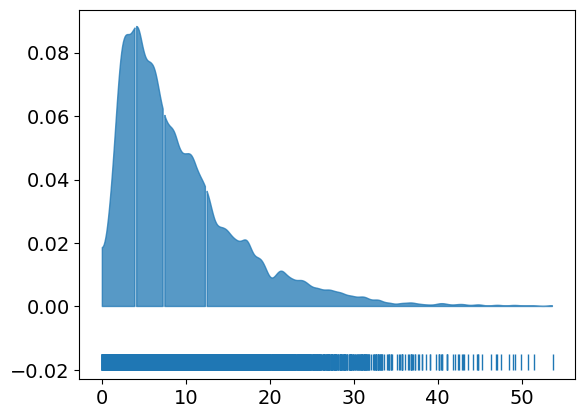

In [51]:
import arviz as az
az.plot_kde(df['NO2'], rug=True, quantiles = [.25, .5, .75])

### Plot heatmap

#### independent variable

In [52]:
SiteName = []
County = []
AQI = []
Pollutant = []
SO2 = []
CO = []
CO_8hr = []
O3 = []
O3_8hr = []
PM10 = []
PM10_AVG = []
PM2_AVG = []
NO2 = []
NOx = []
NO = []
WindSpeed = []
WindDirec = []
SO2_AVG = []
SiteId = []
year = []
month = []
day = []
hour = []
region = []

#### dependent variable

In [54]:
PM2 = []

In [55]:
for index in range(0,6600):
    AQI.append(int(df.at[index,'AQI']))
    County.append(int(df.at[index,'County']))
    Pollutant.append(int(df.at[index,'Pollutant']))
    SO2.append(float(df.at[index,'SO2']))
    CO.append(float(df.at[index,'CO']))
    CO_8hr.append(float(df.at[index,'CO_8hr']))
    O3.append(float(df.at[index,'O3']))
    O3_8hr.append(int(df.at[index,'O3_8hr']))
    PM10.append(int(df.at[index,'PM10']))
#         woman_face.append(int(df.at[index,'woman_face']))
#         man_face.append(int(df.at[index,'man_face']))
    PM10_AVG.append(int(df.at[index,'PM10_AVG']))
    PM2_AVG.append(int(df.at[index,'PM2.5_AVG']))
    NO2.append(float(df.at[index,'NO2']))
    NOx.append(float(df.at[index,'NOx']))
    NO.append(float(df.at[index,'NO']))
#         number_of_follower.append(int(df.at[index,'number_of_follower']))
    WindSpeed.append(float(df.at[index,'WindSpeed']))
    WindDirec.append(int(df.at[index,'WindDirec']))
#     PublishTime.append(int(df.at[index,'PublishTime']))
    SO2_AVG.append(int(df.at[index,'SO2_AVG']))
    SiteId.append(int(df.at[index,'SiteId']))
    year.append(int(df.at[index,'year']))
    month.append(int(df.at[index,'month']))
    day.append(int(df.at[index,'day']))
    hour.append(int(df.at[index,'hour']))
    PM2.append(int(df.at[index,'PM2.5']))
    region.append(int(df.at[index,'region']))

In [56]:
print(len(month),len(Pollutant))

6600 6600


[[ 1.00000000e+00 -9.09270178e-02  6.55327563e-01  2.56955548e-01
   5.04386310e-01  6.27710324e-01  2.68530303e-01  3.59713536e-01
   8.22550600e-01  8.99484639e-01  9.70455631e-01  4.26596116e-01
   3.60789655e-01  1.24327399e-01 -2.15639075e-02  1.52737774e-02
   4.28809712e-01  1.01395804e-01  8.97273229e-01 -2.88934736e-01
  -1.92780547e-02  4.08365137e-02 -2.87797012e-01]
 [-9.09270178e-02  1.00000000e+00 -9.71681529e-02 -6.02973225e-02
   1.26665925e-02  2.08765610e-02 -8.04390367e-02 -8.24173007e-02
  -9.82920080e-02 -1.00905630e-01 -8.04899671e-02  5.71288105e-02
   5.45236824e-02  3.11581140e-02 -6.34940515e-02 -5.73288191e-02
  -8.36962831e-02 -1.58231748e-01 -8.39959205e-02 -6.70668317e-03
   1.30419494e-03 -6.15207998e-03 -5.21938867e-02]
 [ 6.55327563e-01 -9.71681529e-02  1.00000000e+00  1.53634978e-01
   3.17877871e-01  3.71588288e-01  3.24101316e-01  4.47226680e-01
   5.00849562e-01  5.46931435e-01  5.54610117e-01  2.64560911e-01
   2.20792812e-01  7.02367586e-02  1.399

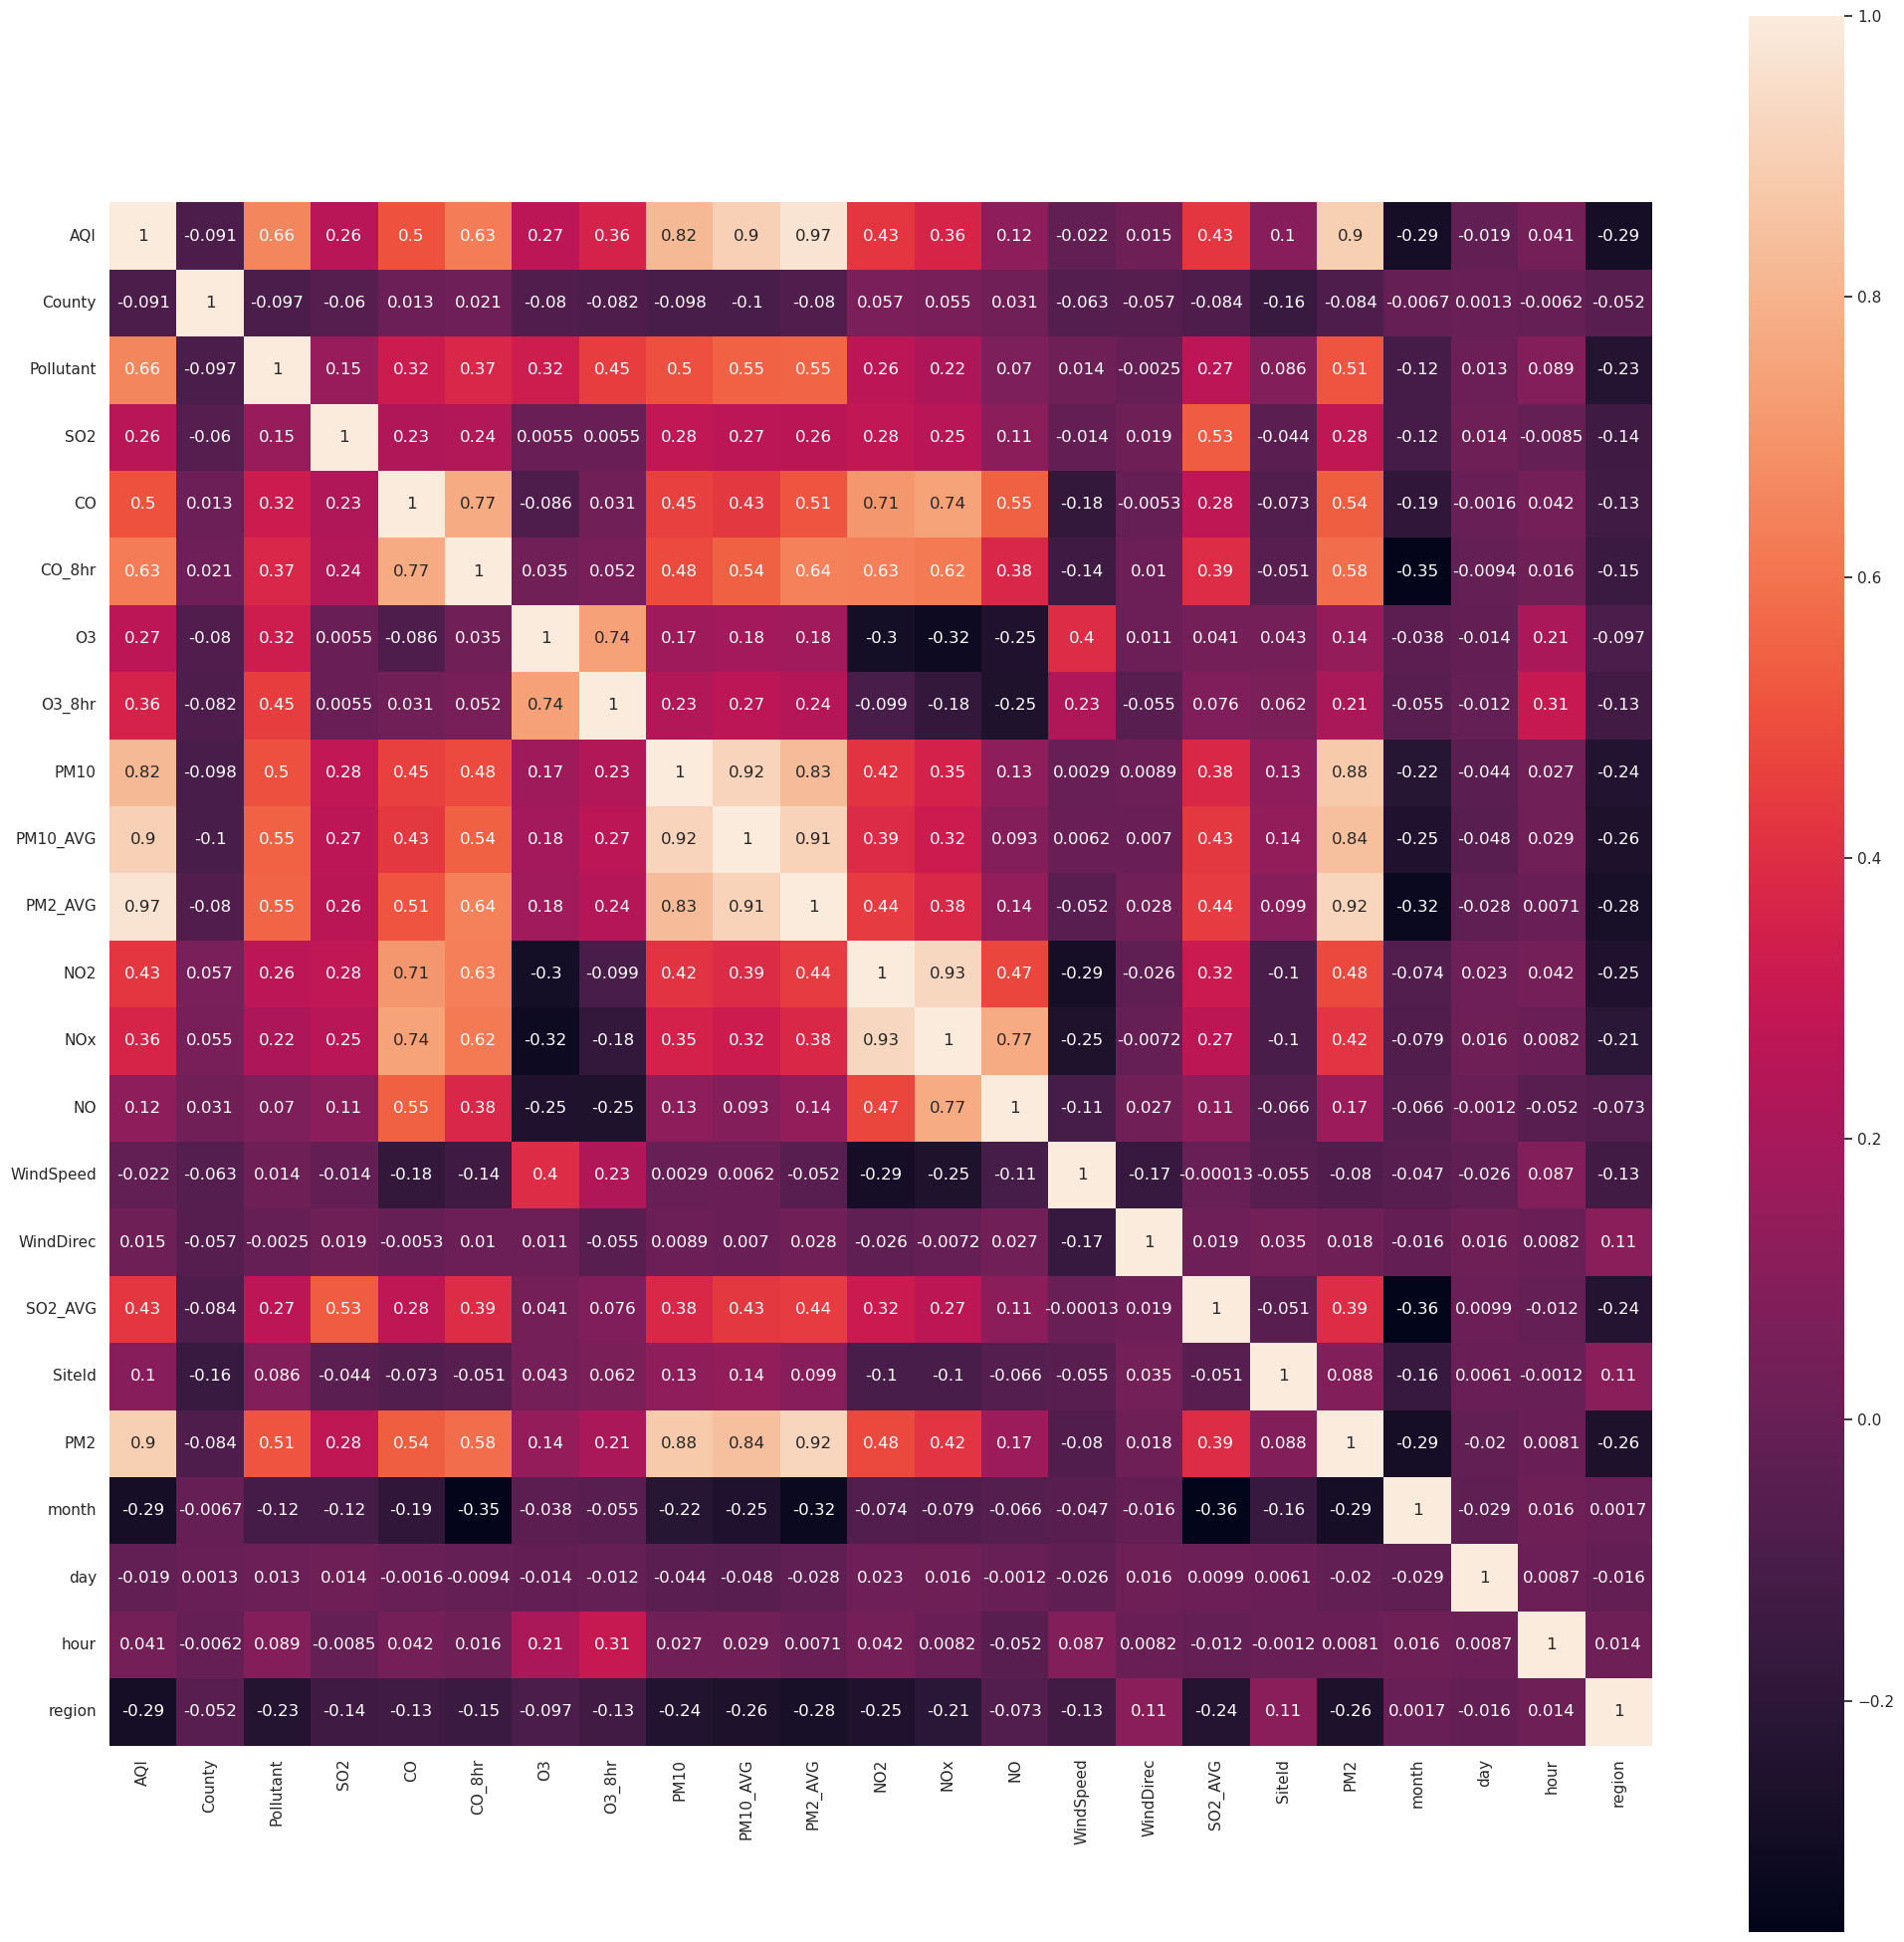

In [ ]:
import numpy as np
import seaborn as sns
X = np.array([AQI, County, Pollutant, SO2, CO, CO_8hr, O3, O3_8hr, PM10, PM10_AVG, PM2_AVG, NO2, NOx, NO, WindSpeed, WindDirec, SO2_AVG, SiteId, PM2, month, day, hour, region]).T  # 將列表轉換為numpy數組
r = np.corrcoef(X, rowvar=False)  # Calculate correlation coefficient, rowvar=False means each column represents a feature

print(r)

# %matplotlib inline
import matplotlib.pyplot as plt
sns.set(font_scale=1)

sns.set_context({"figure.figsize":(25,25)})
sns.heatmap(data=r, square=True, annot=True, 
            xticklabels=['AQI', 'County', 'Pollutant',  'SO2', 'CO', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM10_AVG', 'PM2_AVG', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'SO2_AVG',  'SiteId', 'PM2', 'month', 'day', 'hour', 'region'], 
            yticklabels=['AQI', 'County', 'Pollutant',  'SO2', 'CO', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM10_AVG', 'PM2_AVG', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'SO2_AVG',  'SiteId', 'PM2', 'month', 'day', 'hour', 'region'])
plt.show()

### Plot scatter plot

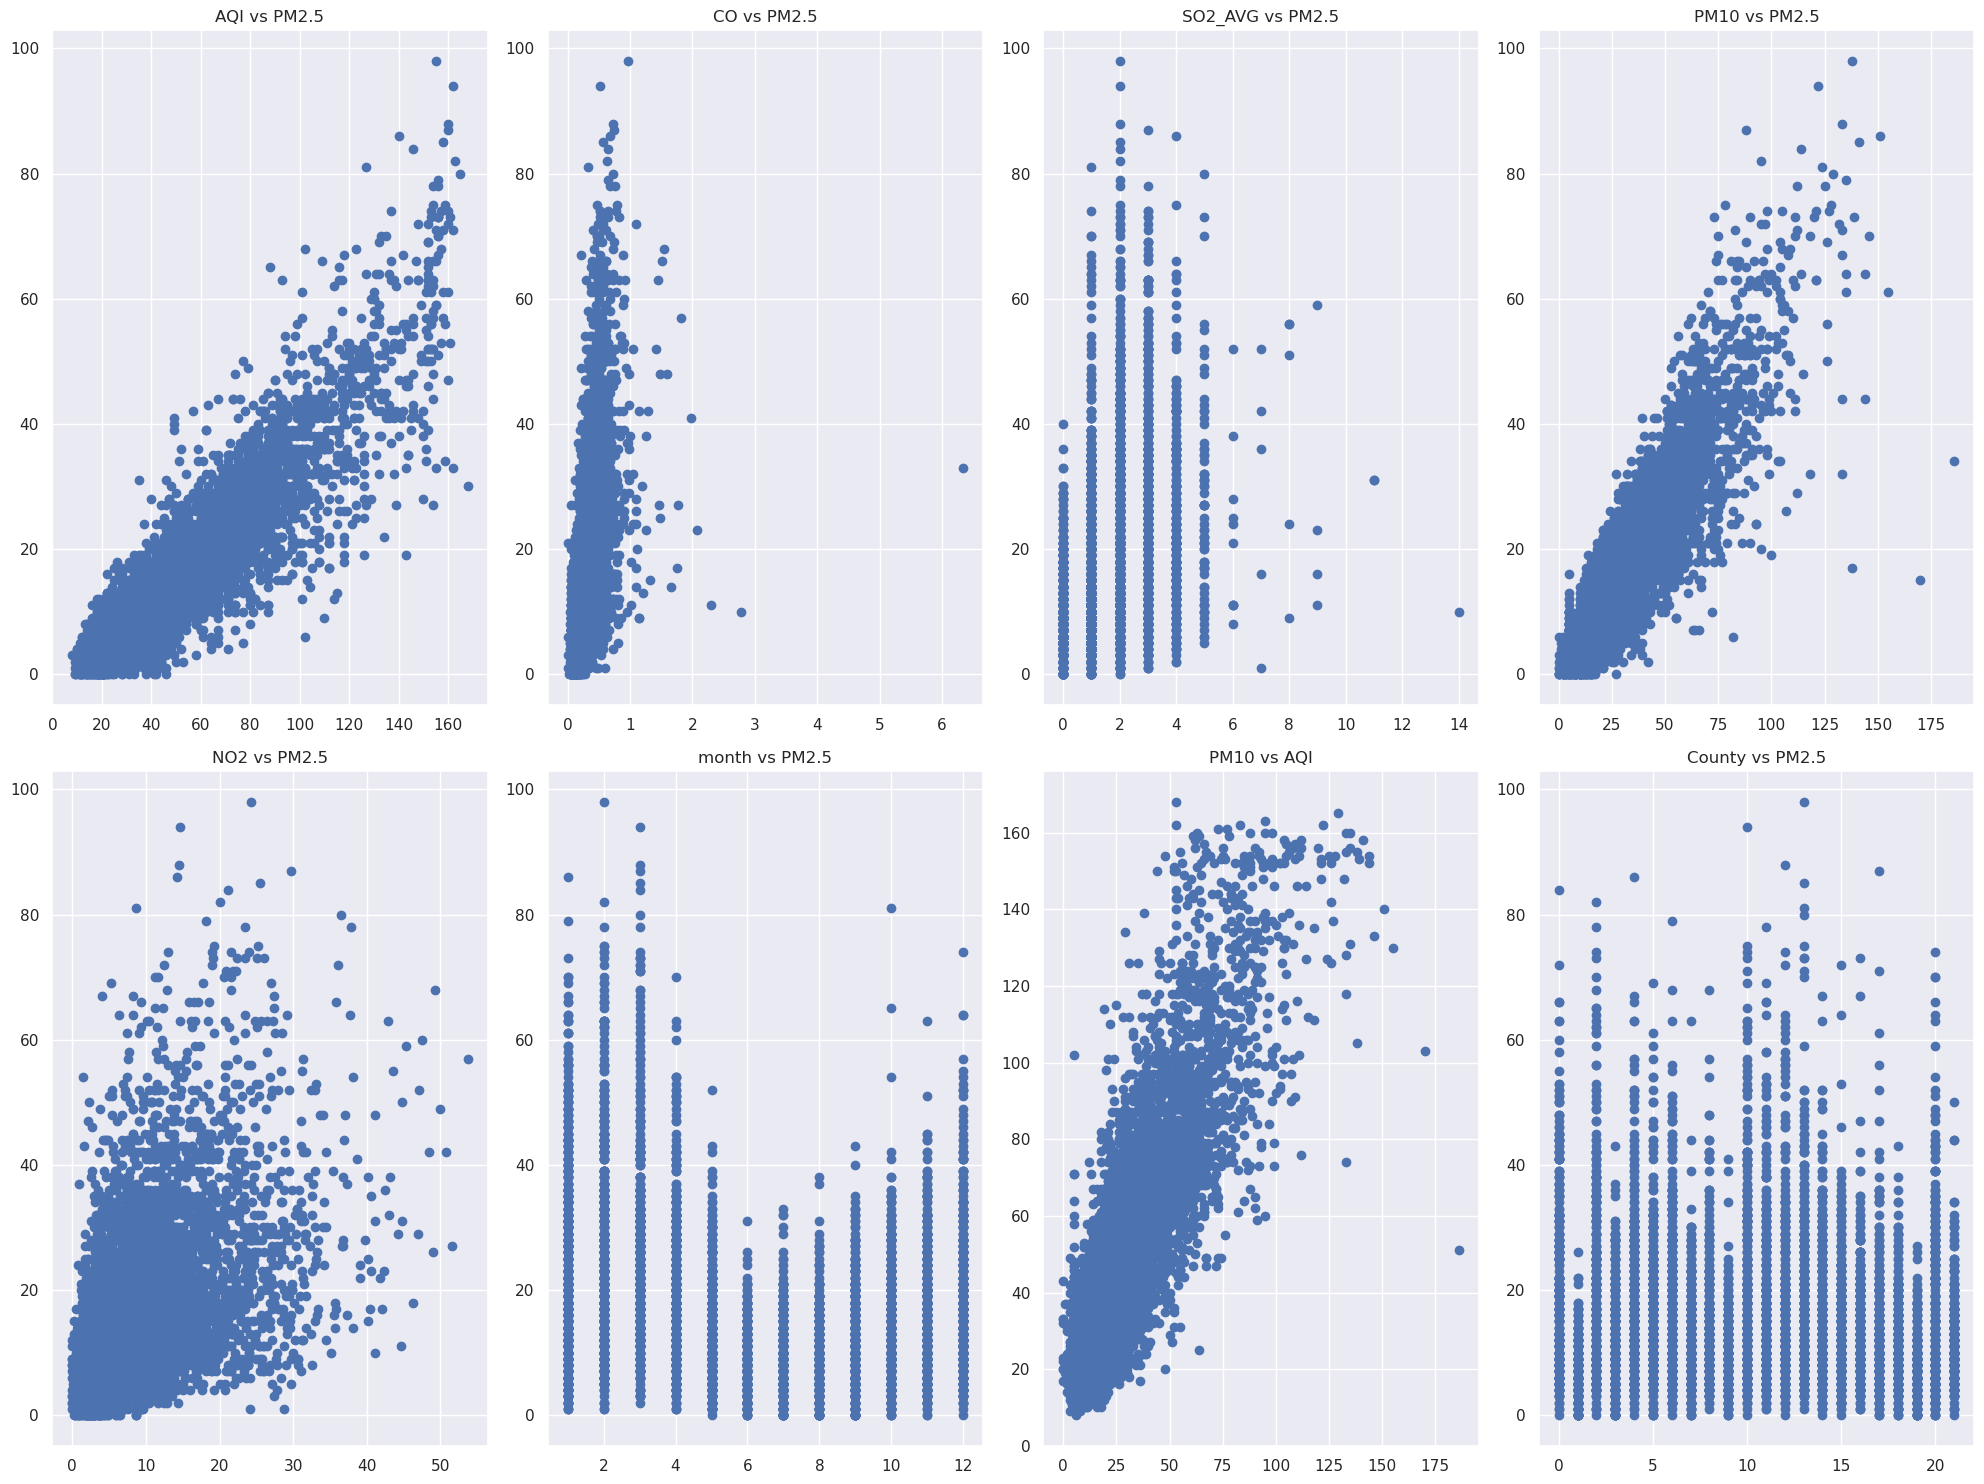

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20, 15))

# Scatter plot 1
axes[0, 0].scatter(df['AQI'], df['PM2.5'])
axes[0, 0].set_title('AQI vs PM2.5')

# Scatter plot 2
axes[0, 1].scatter(df['CO'], df['PM2.5'])
axes[0, 1].set_title('CO vs PM2.5')

# Scatter plot 3
axes[0, 2].scatter(df['SO2_AVG'], df['PM2.5'])
axes[0, 2].set_title('SO2_AVG vs PM2.5')

# Scatter plot 4
axes[0, 3].scatter(df['PM10'], df['PM2.5'])
axes[0, 3].set_title('PM10 vs PM2.5')

# Scatter plot 5
axes[1, 0].scatter(df['NO2'], df['PM2.5'])
axes[1, 0].set_title('NO2 vs PM2.5')

# Scatter plot 6
axes[1, 1].scatter(df['month'], df['PM2.5'])
axes[1, 1].set_title('month vs PM2.5')

# Scatter plot 7
axes[1, 2].scatter(df['PM10'], df['AQI'])
axes[1, 2].set_title('PM10 vs AQI')

# Scatter plot 7
axes[1, 3].scatter(df['County'], df['PM2.5'])
axes[1, 3].set_title('County vs PM2.5')

# Hide the empty subplot
# axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

## Build model

In [59]:
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour,region
0,基隆,21,25.0,0,2.0,2.3,0.56,0.5,2.5,13.0,...,8.5,0.4,311,2.0,1,2021,1,4,0,0
1,基隆,21,33.0,0,2.0,1.3,0.24,0.2,37.1,36.0,...,1.5,1.1,94,2.0,1,2021,1,4,8,0
2,基隆,21,37.0,0,2.0,1.2,0.19,0.2,39.9,40.0,...,1.4,1.1,86,2.0,1,2021,1,4,12,0
3,基隆,21,33.0,0,2.0,1.2,0.22,0.2,35.3,36.0,...,1.1,0.5,272,2.0,1,2021,1,4,20,0
4,基隆,21,27.0,0,2.0,2.0,0.59,0.4,6.6,24.0,...,3.3,1.8,261,1.0,1,2021,1,4,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,關山,1,34.0,0,2.0,1.4,0.11,0.1,2.2,2.8,...,1.8,0.3,327,0.0,80,2022,6,11,6,1
6596,關山,1,34.0,0,2.0,1.3,0.14,0.1,3.1,2.6,...,3.4,0.8,71,0.0,80,2022,6,11,7,1
6597,關山,1,33.0,0,2.0,1.4,0.11,0.1,6.3,2.9,...,3.2,0.6,109,0.0,80,2022,6,11,8,1
6598,關山,1,30.0,0,2.0,1.5,0.12,0.1,18.7,6.0,...,1.4,1.4,68,0.0,80,2022,6,11,10,1


### multivariate linear regression

In [95]:
stand=df['PM2.5'].std()
me=df['PM2.5'].mean()

In [93]:
# 讀取 csv 文件
# data = pd.read_csv('your_file.csv')
df = df.sort_values(by=['region','SiteId','year','month','day'],ascending=True)
# 城市和測站索引
region = df['region'].unique()
region_index = df['region'].apply(lambda x: np.where(region == x)[0][0]).values
region_index.sort()
# stations = df['SiteId'].unique()
# station_index = df['SiteId'].apply(lambda x: np.where(stations == x)[0][0]).values
# station_index.sort()

with pm.Model() as nh_model:
    α_tmp = pm.Normal('α_tmp', mu = 0, sd = 1, shape = 2)
    β = pm.Normal('β', mu = 0, sd = 10, shape = (2,5))
    ε=pm.HalfCauchy('ε', 5)
    v=pm.Exponential('v', 1/30)
    
    y_est = α_tmp[region_index]  + \
            (β[region_index, 0] ) * (df['NO2']-df['NO2'].mean()) + \
            (β[region_index, 1]) * (df['AQI']-df['AQI'].mean()) + \
            (β[region_index, 2]) * (df['SO2']-df['SO2'].mean()) + \
            (β[region_index, 3]) * (df['PM10']-df['PM10'].mean()) + \
            (β[region_index, 4]) * (df['month']-df['month'].mean())
    #     y_est = α_tmp[region_index]  + \
#             (β[region_index, 0] ) * (df['NO2']-df['NO2'].mean()) + \
#             (β[region_index, 1]) * (df['CO']-df['CO'].mean()) + \
#             (β[region_index, 2]) * (df['AQI']-df['AQI'].mean()) + \
#             (β[region_index, 3]) * (df['SO2_AVG']-df['SO2_AVG'].mean()) + \
#             (β[region_index, 4]) * (df['PM10']-df['PM10'].mean()) + \
#             (β[region_index, 5]) * (df['month']-df['month'].mean())
    
    y_pred = pm.StudentT('y_pred', mu = y_est, sd = ε, nu = v, observed=(df['PM2.5']-df['PM2.5'].mean())/df['PM2.5'].std())
    α = pm.Deterministic('α', α_tmp - β[:, 0]*df['NO2'].mean() - β[:, 1]*df['AQI'].mean() - \
                         β[:, 2]*df['SO2'].mean()-β[:, 3]*df['PM10'].mean()-β[:, 4]*df['month'].mean() )
    
#     α = pm.Deterministic('α', α_tmp - β[:, 0]*df['NO2'].mean() - β[:, 1]*df['CO'].mean() - \
#                          β[:, 2]*df['AQI'].mean() - β[:, 3]*df['SO2_AVG'].mean()-β[:, 4]*df['PM10'].mean()-β[:, 5]*df['month'].mean() )
    
with nh_model:
    nh_trace = pm.sample(5000, tune=1000, random_seed=123)
# nh_trace.to_netcdf("nh_trace.nc")

/opt/conda/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


### hierarchy linear regression

In [110]:
df = df.sort_values(by=['region','SiteId','year','month','day'],ascending=True)
# 城市和測站索引
region = df['region'].unique()
region_index = df['region'].apply(lambda x: np.where(region == x)[0][0]).values
region_index.sort()
# stations = df['SiteId'].unique()
# station_index = df['SiteId'].apply(lambda x: np.where(stations == x)[0][0]).values
# station_index.sort()

with pm.Model() as h_model:
#     hyperprior
    α_mu_tmp = pm.Normal('α_mu_tmp', mu = 0, sd = 1)
    α_sd_tmp = pm.HalfNormal('α_sd_tmp',1)
    β_mu = pm.Normal('β_mu', mu = 0, sd = 10)
    β_sd = pm.HalfNormal('β_sd',sd = 10)
#     prior
    α_tmp = pm.Normal('α_tmp', mu = α_mu_tmp, sd = α_sd_tmp, shape=2)
    β = pm.Normal('β', mu = β_mu, sd = β_sd, shape=(2,5))
    ε=pm.HalfCauchy('ε', 5)
    v=pm.Exponential('v', 1/30)
    
    y_est = α_tmp[region_index]  + \
            (β[region_index, 0] ) * (df['NO2']-df['NO2'].mean()) + \
            (β[region_index, 1]) * (df['AQI']-df['AQI'].mean()) + \
            (β[region_index, 2]) * (df['SO2']-df['SO2'].mean()) + \
            (β[region_index, 3]) * (df['PM10']-df['PM10'].mean()) + \
            (β[region_index, 4]) * (df['month']-df['month'].mean())
#     y_est = α_tmp[region_index]  + \
#             (β[region_index, 0] ) * (df['NO2']-df['NO2'].mean()) + \
#             (β[region_index, 1]) * (df['CO']-df['CO'].mean()) + \
#             (β[region_index, 2]) * (df['AQI']-df['AQI'].mean()) + \
#             (β[region_index, 3]) * (df['SO2_AVG']-df['SO2_AVG'].mean())
#     y_est = α_tmp[region_index]  + \
#             (β[region_index, 0] ) * (df['NO2']-df['NO2'].mean()) + \
#             (β[region_index, 1]) * (df['CO']-df['CO'].mean()) + \
#             (β[region_index, 2]) * (df['AQI']-df['AQI'].mean()) + \
#             (β[region_index, 3]) * (df['SO2_AVG']-df['SO2_AVG'].mean()) + \
#             (β[region_index, 4]) * (df['PM10']-df['PM10'].mean()) + \
#             (β[region_index, 5]) * (df['month']-df['month'].mean())
    
    y_pred = pm.StudentT('y_pred', mu = y_est, sd = ε, nu = v, observed=(df['PM2.5']-df['PM2.5'].mean())/df['PM2.5'].std())
    
    α = pm.Deterministic('α', α_tmp - β[:, 0]*df['NO2'].mean() - β[:, 1]*df['AQI'].mean() - \
                         β[:, 2]*df['SO2'].mean() - β[:, 3]*df['PM10'].mean()-β[:, 4]*df['month'].mean())
    
    α_mu =pm.Deterministic('α_mu', α_mu_tmp - β_mu*df['NO2'].mean() - β_mu*df['AQI'].mean() - \
                         β_mu*df['SO2'].mean() - β_mu*df['PM10'].mean()-β_mu*df['month'].mean())
    
    α_sd = pm.Deterministic('α_sd', α_sd_tmp - β_mu*df['NO2'].mean() - β_mu*df['AQI'].mean() - \
                         β_mu*df['SO2'].mean() - β_mu*df['PM10'].mean()-β_mu*df['month'].mean())
with h_model:
    h_trace = pm.sample(5000, tune=1000, random_seed=123)
# nh_trace.to_netcdf("nh_trace.nc")

/opt/conda/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


## Plotting

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<Axes: title={'center': 'α_mu_tmp'}>,
        <Axes: title={'center': 'α_mu_tmp'}>],
       [<Axes: title={'center': 'β_mu'}>,
        <Axes: title={'center': 'β_mu'}>],
       [<Axes: title={'center': 'α_tmp'}>,
        <Axes: title={'center': 'α_tmp'}>],
       [<Axes: title={'center': 'β'}>, <Axes: title={'center': 'β'}>],
       [<Axes: title={'center': 'α_sd_tmp'}>,
        <Axes: title={'center': 'α_sd_tmp'}>],
       [<Axes: title={'center': 'β_sd'}>,
        <Axes: title={'center': 'β_sd'}>],
       [<Axes: title={'center': 'ε'}>, <Axes: title={'center': 'ε'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>],
       [<Axes: title={'center': 'α'}>, <Axes: title={'center': 'α'}>],
       [<Axes: title={'center': 'α_mu'}>,
        <Axes: title={'center': 'α_mu'}>],
       [<Axes: title={'center': 'α_sd'}>,
        <Axes: title={'center': 'α_sd'}>]], dtype=object)

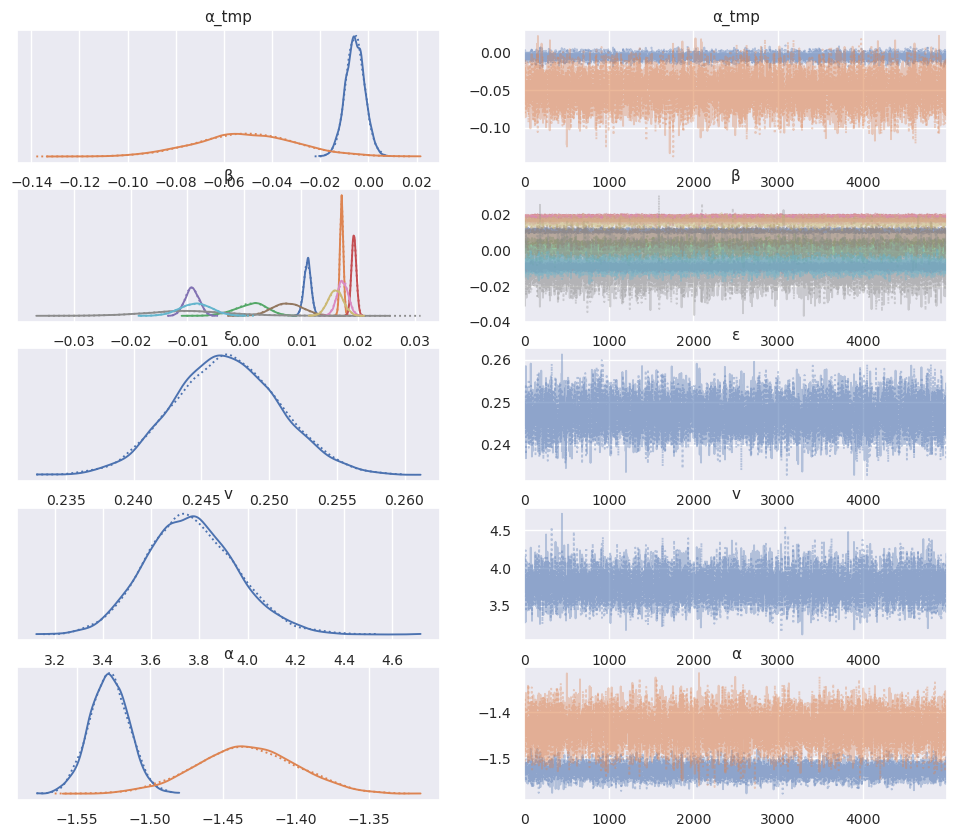

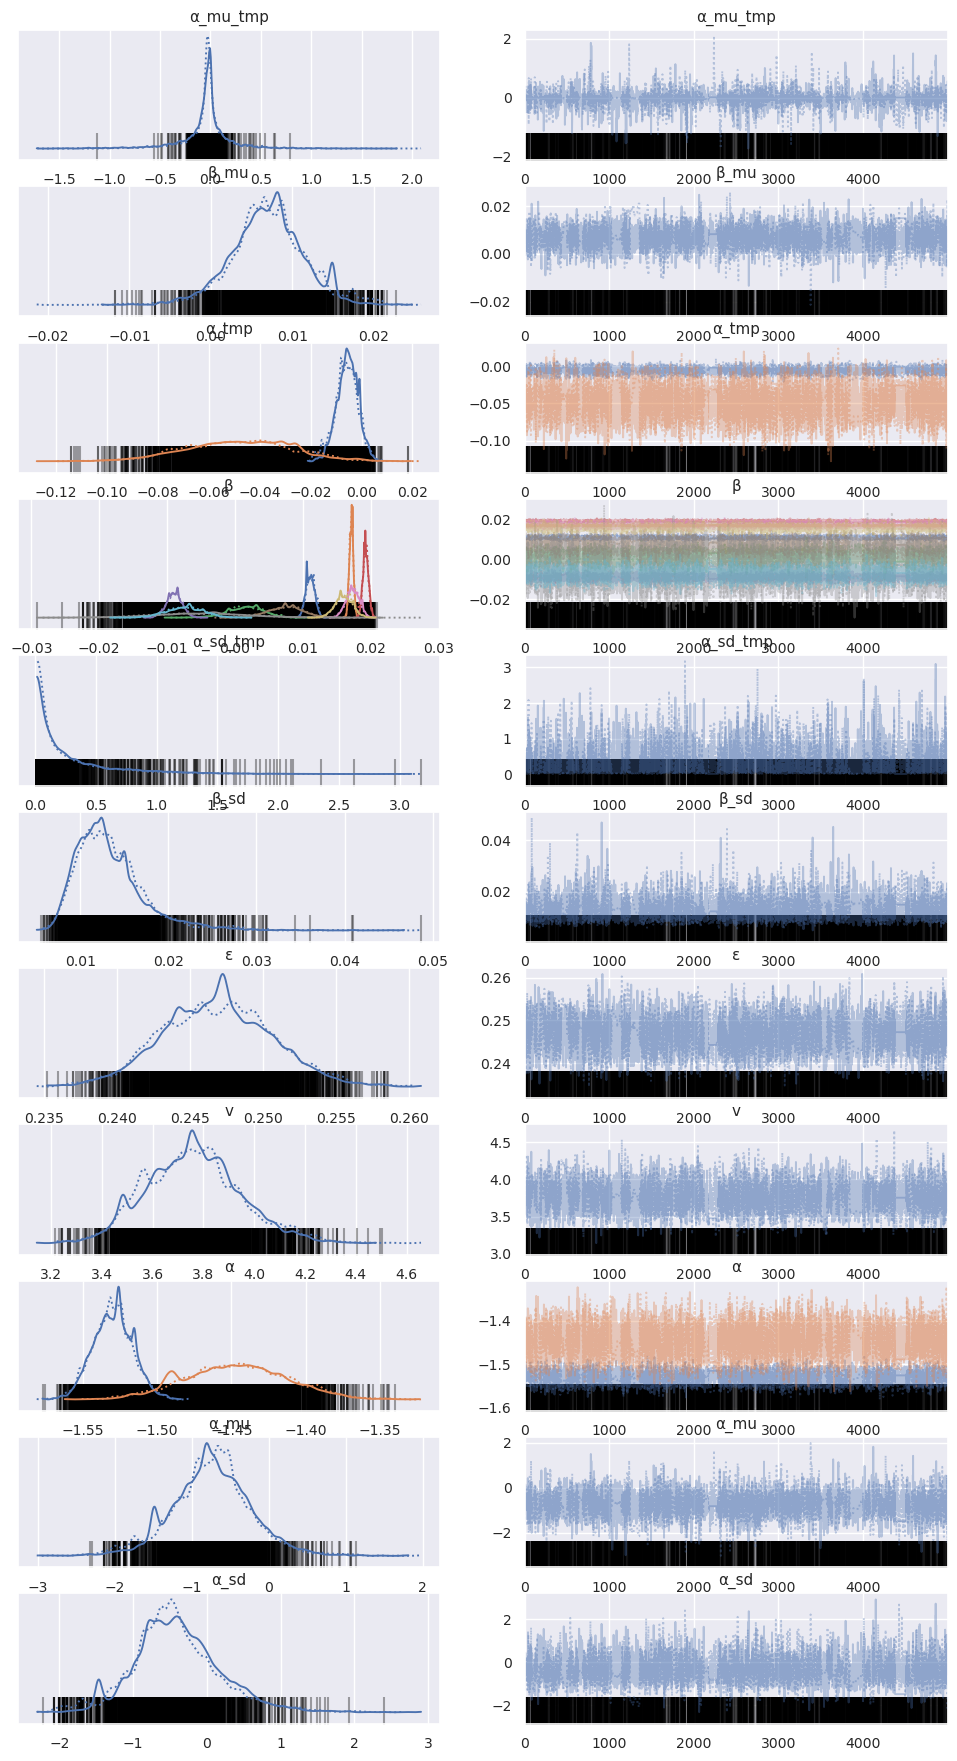

In [111]:
az.plot_trace(nh_trace)
az.plot_trace(h_trace)

In [97]:
az.summary(nh_trace)
# az.summary(h_trace)

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp[0],-0.006,0.004,-0.013,0.002,0.000,0.000,14643.0,7580.0,1.0
α_tmp[1],-0.051,0.021,-0.090,-0.011,0.000,0.000,11938.0,6805.0,1.0
"β[0, 0]",0.011,0.001,0.010,0.012,0.000,0.000,13290.0,7944.0,1.0
"β[0, 1]",0.017,0.000,0.017,0.018,0.000,0.000,10363.0,7661.0,1.0
"β[0, 2]",0.001,0.003,-0.004,0.006,0.000,0.000,14270.0,6671.0,1.0
"β[0, 3]",0.019,0.000,0.018,0.020,0.000,0.000,10626.0,7932.0,1.0
"β[0, 4]",-0.009,0.001,-0.011,-0.007,0.000,0.000,14288.0,7799.0,1.0
"β[1, 0]",0.008,0.003,0.003,0.013,0.000,0.000,13584.0,7456.0,1.0
"β[1, 1]",0.017,0.001,0.015,0.019,0.000,0.000,10617.0,6984.0,1.0
"β[1, 2]",-0.010,0.008,-0.024,0.004,0.000,0.000,14719.0,6359.0,1.0


In [112]:
az.summary(h_trace)

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_mu_tmp,-0.040,0.258,-0.600,0.452,0.005,0.004,3386.0,2406.0,1.00
β_mu,0.007,0.005,-0.002,0.015,0.000,0.000,639.0,287.0,1.00
α_tmp[0],-0.006,0.004,-0.014,0.003,0.000,0.000,531.0,184.0,1.01
α_tmp[1],-0.048,0.021,-0.085,-0.009,0.001,0.001,853.0,1228.0,1.00
"β[0, 0]",0.011,0.001,0.010,0.012,0.000,0.000,766.0,1173.0,1.00
"β[0, 1]",0.017,0.000,0.017,0.018,0.000,0.000,2264.0,2170.0,1.00
"β[0, 2]",0.002,0.003,-0.003,0.007,0.000,0.000,661.0,305.0,1.00
"β[0, 3]",0.019,0.000,0.018,0.020,0.000,0.000,714.0,185.0,1.00
"β[0, 4]",-0.009,0.001,-0.011,-0.007,0.000,0.000,2587.0,2753.0,1.00
"β[1, 0]",0.007,0.003,0.002,0.012,0.000,0.000,965.0,376.0,1.01


/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


ValueError: not enough values to unpack (expected 2, got 1)

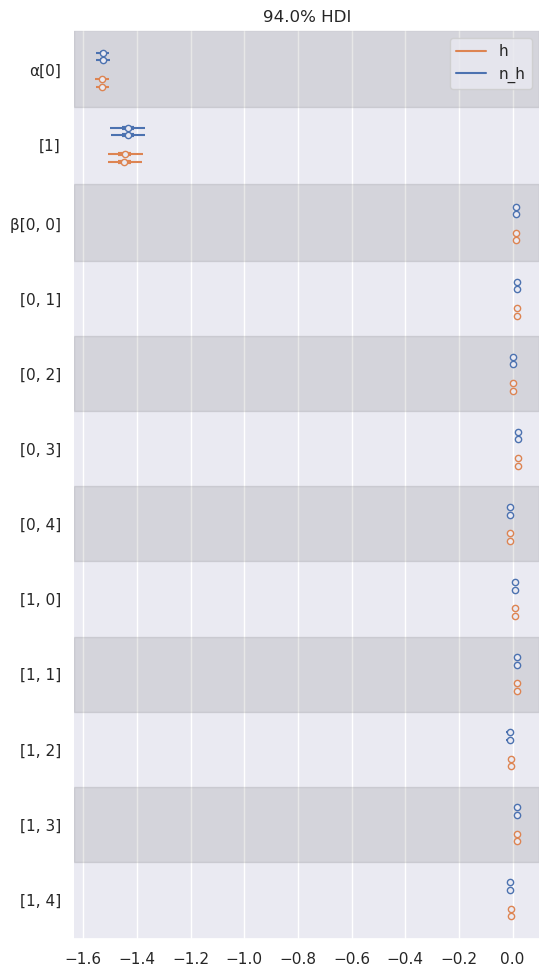

In [114]:
# az.plot_forest(nh_trace, var_names=['α', 'β'], combined= True)
# az.plot_forest(h_trace, var_names=['α', 'β'], combined= True)
_,axes = az.plot_forest([nh_trace, h_trace], model_names = ['n_h','h'], var_names=['α', 'β'], combined=False,colors='cycle')
y_lims = axes[0].get_ylim()

### posterior predictive check - multivariate linear

/opt/conda/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


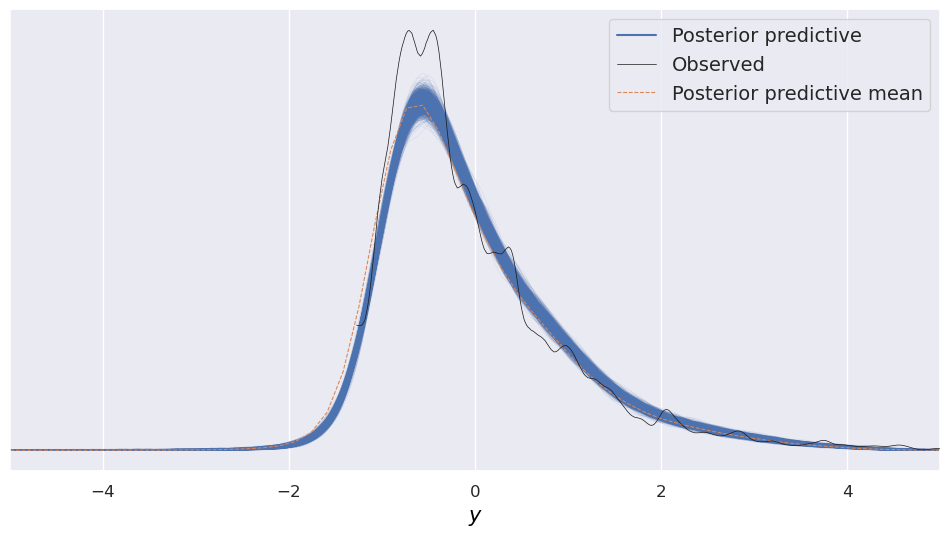

In [99]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Perform posterior predictive check
ppc = pm.sample_posterior_predictive(nh_trace, 2000,model=nh_model)

# Create an InferenceData object
data = az.from_pymc3(trace=nh_trace, posterior_predictive=ppc)

# Plot the posterior predictive check
ax=az.plot_ppc(data, figsize=(12, 6), mean=True)
ax.tick_params(axis='x', labelsize=12)
plt.legend(fontsize=14)
plt.xlabel('y', fontdict = {'fontsize' : 15,'fontstyle' : 'oblique','color':'black','fontfamily': 'fantasy'})
plt.xlim(-5,5)
plt.show()

### posterior predictive check - hierarchy linear

/opt/conda/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


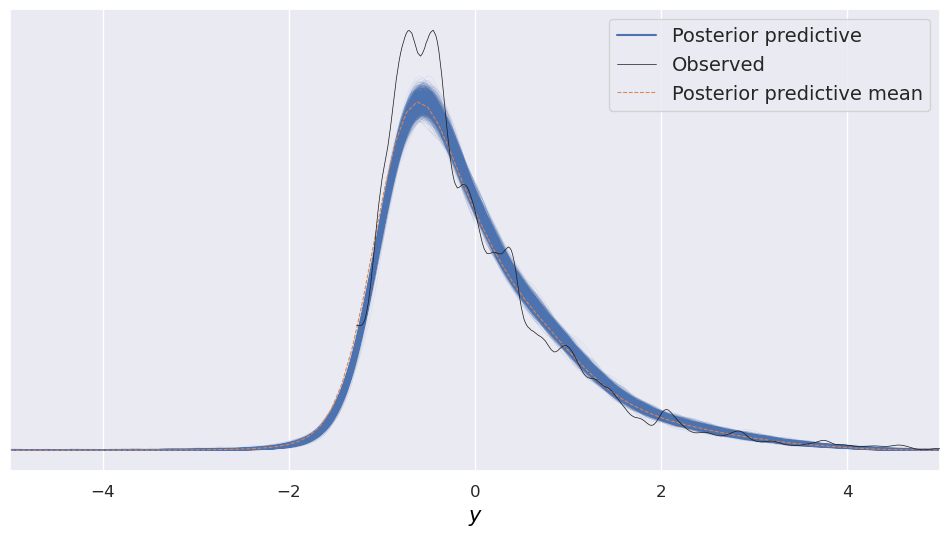

In [115]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Perform posterior predictive check
ppc = pm.sample_posterior_predictive(h_trace, 2000,model=h_model)

# Create an InferenceData object
data = az.from_pymc3(trace=h_trace, posterior_predictive=ppc)

# Plot the posterior predictive check
ax=az.plot_ppc(data, figsize=(12, 6), mean=True)
ax.tick_params(axis='x', labelsize=12)
plt.legend(fontsize=14)
plt.xlabel('y', fontdict = {'fontsize' : 15,'fontstyle' : 'oblique','color':'black','fontfamily': 'fantasy'})
plt.xlim(-5,5)
plt.show()

In [128]:
loo_I = az.loo(nh_trace)
loo_I

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 10000 posterior samples and 6600 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1991.29    81.15
p_loo       16.78        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     6600  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [100]:
waic_I = az.waic(nh_trace)
waic_I

/opt/conda/lib/python3.10/site-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 10000 posterior samples and 6600 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1991.26    81.15
p_waic       16.75        -

There has been a warning during the calculation. Please check the results.

In [129]:
loo_hI = az.loo(h_trace)
loo_hI

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 10000 posterior samples and 6600 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1991.46    81.13
p_loo       16.77        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     6600  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [116]:
waic_hI = az.waic(h_trace)
waic_hI

/opt/conda/lib/python3.10/site-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 10000 posterior samples and 6600 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1991.42    81.12
p_waic       16.73        -

There has been a warning during the calculation. Please check the results.

### Prediction

In [119]:
df['region']

0       0
1       0
2       0
3       0
4       0
       ..
6595    1
6596    1
6597    1
6598    1
6599    1
Name: region, Length: 6600, dtype: int64

### 

#### West

In [133]:
df0 = df[df['region']==0]
df0

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour,region
0,基隆,21,25.0,0,2.0,2.3,0.56,0.5,2.5,13.0,...,8.5,0.4,311,2.0,1,2021,1,4,0,0
1,基隆,21,33.0,0,2.0,1.3,0.24,0.2,37.1,36.0,...,1.5,1.1,94,2.0,1,2021,1,4,8,0
2,基隆,21,37.0,0,2.0,1.2,0.19,0.2,39.9,40.0,...,1.4,1.1,86,2.0,1,2021,1,4,12,0
3,基隆,21,33.0,0,2.0,1.2,0.22,0.2,35.3,36.0,...,1.1,0.5,272,2.0,1,2021,1,4,20,0
4,基隆,21,27.0,0,2.0,2.0,0.59,0.4,6.6,24.0,...,3.3,1.8,261,1.0,1,2021,1,4,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,屏東(枋寮),20,30.0,0,2.0,0.0,0.10,0.1,10.4,20.0,...,1.8,0.7,133,0.0,313,2021,5,24,0,0
5696,屏東(枋寮),20,24.0,0,2.0,0.5,0.05,0.1,27.8,26.0,...,0.3,0.6,54,0.0,313,2021,5,24,20,0
5697,屏東(枋寮),20,35.0,0,2.0,2.7,0.17,0.1,9.3,21.0,...,3.2,0.2,11,1.0,313,2021,5,24,23,0
5698,屏東(枋寮),20,35.0,0,2.0,0.5,0.16,0.1,5.5,16.0,...,2.3,0.9,61,14.0,313,2021,5,28,0,0


In [134]:
# west
summary = az.summary(nh_trace)
α0_mean = summary.loc['α[0]', 'mean']
β00_mean = summary.loc['β[0, 0]', 'mean']
β01_mean = summary.loc['β[0, 1]', 'mean']
β02_mean = summary.loc['β[0, 2]', 'mean']
β03_mean = summary.loc['β[0, 3]', 'mean']
β04_mean = summary.loc['β[0, 4]', 'mean']
# β05_mean = summary.loc['β[0, 5]', 'mean']

# pred0 = α0_mean + β00_mean*(df0['AQI']) + β01_mean*(df0['CO']) + β02_mean*(df0['PM2.5_AVG']) + β03_mean*(df0['SO2_AVG']) + β04_mean*(df0['PM10']) + β05_mean*(df0['month'])
pred_nh_0 = (α0_mean + β00_mean*(df0['NO2'])  + β01_mean*(df0['AQI']) + β02_mean*(df0['SO2']) + β03_mean*(df0['PM10'])+ β04_mean*(df0['month']))*stand + me 

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [136]:
pr0_nh=list(pred_nh_0)

In [137]:
# west
summary = az.summary(h_trace)
α0_mean = summary.loc['α[0]', 'mean']
β00_mean = summary.loc['β[0, 0]', 'mean']
β01_mean = summary.loc['β[0, 1]', 'mean']
β02_mean = summary.loc['β[0, 2]', 'mean']
β03_mean = summary.loc['β[0, 3]', 'mean']
β04_mean = summary.loc['β[0, 4]', 'mean']
# β05_mean = summary.loc['β[0, 5]', 'mean']

# pred0 = α0_mean + β00_mean*(df0['AQI']) + β01_mean*(df0['CO']) + β02_mean*(df0['PM2.5_AVG']) + β03_mean*(df0['SO2_AVG']) + β04_mean*(df0['PM10']) + β05_mean*(df0['month'])
pred_h_0 = (α0_mean + β00_mean*(df0['NO2'])  + β01_mean*(df0['AQI']) + β02_mean*(df0['SO2']) + β03_mean*(df0['PM10'])+ β04_mean*(df0['month']))*stand + me 

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [138]:
pr0_h=list(pred_h_0)

#### East

In [139]:
df1 = df[df['region']==1]
df1

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NO,WindSpeed,WindDirec,SO2_AVG,SiteId,year,month,day,hour,region
5700,臺東,1,26.0,0,2.0,1.1,0.29,0.3,41.9,28.0,...,2.4,3.0,67,1.0,62,2021,1,4,12,1
5701,臺東,1,35.0,0,2.0,1.2,0.27,0.3,43.8,38.0,...,2.1,3.0,53,1.0,62,2021,1,4,16,1
5702,臺東,1,39.0,0,2.0,1.1,0.37,0.3,34.2,42.0,...,1.0,0.9,327,1.0,62,2021,1,4,20,1
5703,臺東,1,24.0,0,2.0,0.5,0.42,0.4,26.0,26.0,...,2.1,2.4,331,1.0,62,2021,1,8,12,1
5704,臺東,1,25.0,0,2.0,0.5,0.23,0.3,30.5,27.0,...,0.3,2.1,324,1.0,62,2021,1,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,關山,1,34.0,0,2.0,1.4,0.11,0.1,2.2,2.8,...,1.8,0.3,327,0.0,80,2022,6,11,6,1
6596,關山,1,34.0,0,2.0,1.3,0.14,0.1,3.1,2.6,...,3.4,0.8,71,0.0,80,2022,6,11,7,1
6597,關山,1,33.0,0,2.0,1.4,0.11,0.1,6.3,2.9,...,3.2,0.6,109,0.0,80,2022,6,11,8,1
6598,關山,1,30.0,0,2.0,1.5,0.12,0.1,18.7,6.0,...,1.4,1.4,68,0.0,80,2022,6,11,10,1


In [140]:
# east
summary = az.summary(nh_trace)
α1_mean = summary.loc['α[1]', 'mean']
β10_mean = summary.loc['β[1, 0]', 'mean']
β11_mean = summary.loc['β[1, 1]', 'mean']
β12_mean = summary.loc['β[1, 2]', 'mean']
β13_mean = summary.loc['β[1, 3]', 'mean']
β14_mean = summary.loc['β[1, 4]', 'mean']
# β15_mean = summary.loc['β[1, 5]', 'mean']

# pred1 = α1_mean + β10_mean*(df1['AQI']) + β11_mean*(df1['CO']) + β12_mean*(df1['PM2.5_AVG']) + β13_mean*(df1['SO2_AVG']) + β14_mean*(df1['PM10']) + β15_mean*(df1['month'])
pred_nh_1 = (α1_mean + β10_mean*(df1['NO2'])  + β11_mean*(df1['AQI']) + β12_mean*(df1['SO2']) + β13_mean*(df1['PM10'])+β14_mean*(df1['month']) )*stand+me

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [145]:
pr1_nh=list(pred_nh_1)

In [146]:
# east
summary = az.summary(h_trace)
α1_mean = summary.loc['α[1]', 'mean']
β10_mean = summary.loc['β[1, 0]', 'mean']
β11_mean = summary.loc['β[1, 1]', 'mean']
β12_mean = summary.loc['β[1, 2]', 'mean']
β13_mean = summary.loc['β[1, 3]', 'mean']
β14_mean = summary.loc['β[1, 4]', 'mean']
# β15_mean = summary.loc['β[1, 5]', 'mean']

# pred1 = α1_mean + β10_mean*(df1['AQI']) + β11_mean*(df1['CO']) + β12_mean*(df1['PM2.5_AVG']) + β13_mean*(df1['SO2_AVG']) + β14_mean*(df1['PM10']) + β15_mean*(df1['month'])
pred_h_1 = (α1_mean + β10_mean*(df1['NO2'])  + β11_mean*(df1['AQI']) + β12_mean*(df1['SO2']) + β13_mean*(df1['PM10'])+β14_mean*(df1['month']) )*stand+me

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [147]:
pr1_h=list(pred_h_1)

### Display scatter plot

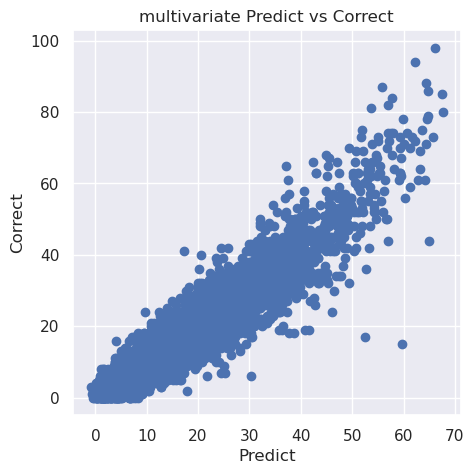

In [150]:
import matplotlib.pyplot as plt
predict=pr0_nh+pr1_nh
# 假设 predict 和 label 是你的数据
label = list(df['PM2.5'])
plt.figure(figsize=(5, 5))
# 绘制图形
plt.scatter(predict, label)

# 添加标题和轴标签
plt.title("multivariate Predict vs Correct")
plt.xlabel("Predict")
plt.ylabel("Correct")

# 显示图形

plt.show()

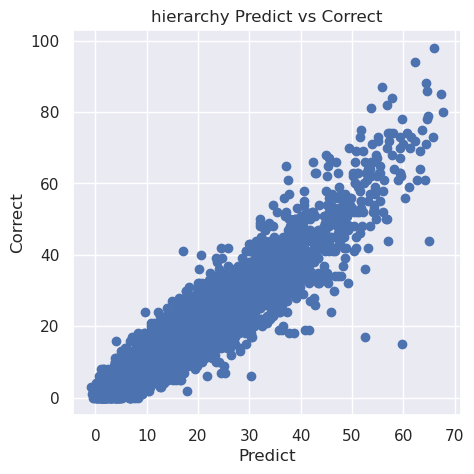

In [153]:
import matplotlib.pyplot as plt
predict=pr0_h+pr1_h
# 假设 predict 和 label 是你的数据
label = list(df['PM2.5'])
plt.figure(figsize=(5, 5))
# 绘制图形
plt.scatter(predict, label)

# 添加标题和轴标签
plt.title("multivariate Predict vs Correct")
plt.xlabel("Predict")
plt.ylabel("Correct")

# 显示图形

plt.show()

## Plot MSE score

In [152]:
from sklearn.metrics import mean_squared_error

# Assume predict and label are your predicted values and true labels, respectively

# Calculate the MSE loss
mse_loss = mean_squared_error(label, predict)

# Print the MSE loss
print("multivariate MSE Loss:", mse_loss)

multivariate MSE Loss: 19.98560343440822


In [154]:
from sklearn.metrics import mean_squared_error

# Assume predict and label are your predicted values and true labels, respectively

# Calculate the MSE loss
mse_loss = mean_squared_error(label, predict)

# Print the MSE loss
print("hierarchy MSE Loss:", mse_loss)

hierarchy MSE Loss: 19.983612202770058


## Retrieve CSV for prediction period

In [158]:
pre_df=pd.read_csv('/kaggle/input/answwer/answert.csv')

In [159]:
pre_df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,WindSpeed,WindDirec,SO2_AVG,Longitude,Latitude,SiteId,year,month,day,hour
0,西屯,臺中市,21.0,0,良好,0.7,0.13,0.1,21.0,23.5,...,0.8,335,1.0,120.616917,24.162197,32,2022,7,14,0
1,西屯,臺中市,19.0,0,良好,0.7,0.13,0.1,20.4,21.7,...,0.5,162,1.0,120.616917,24.162197,32,2022,7,14,1
2,西屯,臺中市,28.0,0,良好,0.9,0.20,0.1,4.5,18.6,...,1.1,181,1.0,120.616917,24.162197,32,2022,7,14,2
3,西屯,臺中市,23.0,0,良好,1.3,0.16,0.1,6.4,16.2,...,1.7,175,1.0,120.616917,24.162197,32,2022,7,14,3
4,西屯,臺中市,22.0,0,良好,1.4,0.17,0.1,4.0,14.2,...,1.5,192,1.0,120.616917,24.162197,32,2022,7,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,西屯,臺中市,25.0,0,良好,2.1,0.14,0.1,16.7,23.8,...,2.5,222,1.0,120.616917,24.162197,32,2022,7,18,19
116,西屯,臺中市,26.0,0,良好,1.6,0.14,0.1,13.4,22.5,...,2.0,210,1.0,120.616917,24.162197,32,2022,7,18,20
117,西屯,臺中市,25.0,0,良好,1.2,0.18,0.1,11.5,20.7,...,2.8,174,1.0,120.616917,24.162197,32,2022,7,18,21
118,西屯,臺中市,24.0,0,良好,0.9,0.14,0.1,10.3,18.9,...,2.1,179,1.0,120.616917,24.162197,32,2022,7,18,22


In [160]:
pre_df.isnull().any()

SiteName     False
County       False
AQI          False
Pollutant    False
Status       False
SO2          False
CO           False
CO_8hr       False
O3           False
O3_8hr       False
PM10         False
PM10_AVG     False
PM2.5        False
PM2.5_AVG    False
NO2          False
NOx          False
NO           False
WindSpeed    False
WindDirec    False
SO2_AVG      False
Longitude    False
Latitude     False
SiteId       False
year         False
month        False
day          False
hour         False
dtype: bool

In [163]:
summary = az.summary(nh_trace)
α0_mean = summary.loc['α[0]', 'mean']
β00_mean = summary.loc['β[0, 0]', 'mean']
β01_mean = summary.loc['β[0, 1]', 'mean']
β02_mean = summary.loc['β[0, 2]', 'mean']
β03_mean = summary.loc['β[0, 3]', 'mean']
β04_mean = summary.loc['β[0, 4]', 'mean']

ans_nh_0 = (α0_mean + β00_mean*(pre_df['NO2'])  + β01_mean*(pre_df['AQI']) + β02_mean*(pre_df['SO2']) + β03_mean*(pre_df['PM10'])+ β04_mean*(pre_df['month']))*stand + me

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [164]:
summary = az.summary(h_trace)
α0_mean = summary.loc['α[0]', 'mean']
β00_mean = summary.loc['β[0, 0]', 'mean']
β01_mean = summary.loc['β[0, 1]', 'mean']
β02_mean = summary.loc['β[0, 2]', 'mean']
β03_mean = summary.loc['β[0, 3]', 'mean']
β04_mean = summary.loc['β[0, 4]', 'mean']

ans_h_0 = (α0_mean + β00_mean*(pre_df['NO2'])  + β01_mean*(pre_df['AQI']) + β02_mean*(pre_df['SO2']) + β03_mean*(pre_df['PM10'])+ β04_mean*(pre_df['month']))*stand + me

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [166]:
ans_nh=list(ans_nh_0)
len(ans_nh)

120

In [167]:
ans_h=list(ans_h_0)
len(ans_h)

120

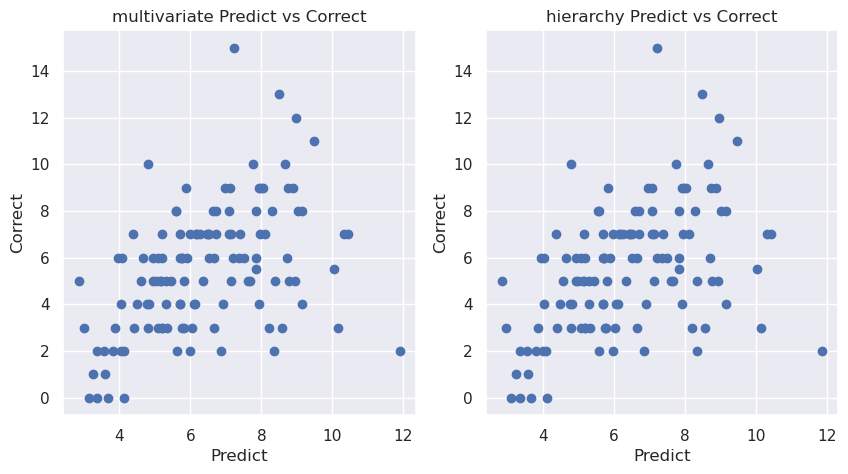

In [184]:
import matplotlib.pyplot as plt
predict_nh=ans_nh
predict_h=ans_h
# 假设 predict 和 label 是你的数据
label = list(pre_df['PM2.5'])
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# plt.figure(figsize=(5, 5))
# 绘制图形
axes[0].scatter(predict_nh, label)
axes[0].set_title("multivariate Predict vs Correct")
axes[0].set_xlabel("Predict")
axes[0].set_ylabel("Correct")

axes[1].scatter(predict_h, label)
axes[1].set_title("hierarchy Predict vs Correct")
axes[1].set_xlabel("Predict")
axes[1].set_ylabel("Correct")

# 显示图形

plt.show()

In [169]:
set(label)

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 5.5,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 15.0}

In [170]:
set(predict)

{2.868380415178576,
 2.9938667748683763,
 3.129392043333361,
 3.2548784030231594,
 3.3653063995501817,
 3.5635748478600657,
 3.5899269833949266,
 3.6915709347436607,
 3.8308607939993387,
 3.8885845194566464,
 3.971405516851915,
 4.035403560293712,
 4.056736241440978,
 4.064265423022368,
 4.115714830495186,
 4.140812102433145,
 4.384255640231354,
 4.413117502960004,
 4.4997030911459674,
 4.593817860913317,
 4.671619403920996,
 4.774518218866628,
 4.799615490804591,
 4.800870354401486,
 4.833496807920836,
 4.945179668044755,
 4.95647344041684,
 5.0204714838586355,
 5.091998708881821,
 5.1484675707422305,
 5.177329433470884,
 5.191132933036764,
 5.194897523827459,
 5.1974072510212554,
 5.207446159796435,
 5.310344974742073,
 5.312854701935866,
 5.336697110276932,
 5.460928606369832,
 5.581395511672037,
 5.586414966059632,
 5.610257374400694,
 5.703117280571144,
 5.704372144168044,
 5.709391598555632,
 5.714411052943223,
 5.749547233656367,
 5.750802097253267,
 5.807270959113673,
 5.812290

In [171]:
print(label)

[3.0, 2.0, 2.0, 7.0, 7.0, 4.0, 5.0, 7.0, 9.0, 7.0, 9.0, 15.0, 5.5, 7.0, 5.0, 3.0, 6.0, 4.0, 4.0, 5.0, 6.0, 4.0, 3.0, 6.0, 8.0, 7.0, 7.0, 7.0, 8.0, 7.0, 7.0, 3.0, 4.0, 4.0, 7.0, 6.0, 6.0, 3.0, 3.0, 6.0, 7.0, 4.0, 2.0, 3.0, 2.0, 3.0, 5.0, 5.0, 6.0, 4.0, 2.0, 2.0, 1.0, 0.0, 0.0, 2.0, 3.0, 7.0, 6.0, 3.0, 5.0, 10.0, 9.0, 9.0, 5.0, 2.0, 5.0, 5.0, 3.0, 6.0, 6.0, 6.0, 8.0, 7.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 3.0, 1.0, 0.0, 0.0, 2.0, 7.0, 7.0, 10.0, 10.0, 8.0, 7.0, 8.0, 12.0, 11.0, 9.0, 7.0, 6.0, 8.0, 9.0, 5.0, 2.0, 6.0, 6.0, 5.0, 9.0, 6.0, 5.0, 3.0, 5.5, 3.0, 3.0, 6.0, 9.0, 13.0, 8.0, 5.0, 8.0, 8.0, 6.0, 4.0]


In [185]:
from sklearn.metrics import mean_squared_error

# Assume predict and label are your predicted values and true labels, respectively

# Calculate the MSE loss
mse_loss = mean_squared_error(label, predict_nh)

# Print the MSE loss
print("test multivariate MSE Loss:", mse_loss)

test multivariate MSE Loss: 7.020136554261216


In [187]:
from sklearn.metrics import mean_squared_error

# Assume predict and label are your predicted values and true labels, respectively

# Calculate the MSE loss
mse_loss = mean_squared_error(label, predict_h)

# Print the MSE loss
print("test heirarchy MSE Loss:", mse_loss)

test heirarchy MSE Loss: 6.999522115056641


### Write answers to Submission.csv

In [191]:
sub = pd.read_csv('/kaggle/input/submit/Submission.csv')
sub

,PublishTime,SiteId,PM2.5,Predict_PM2.5
0,2022/7/14 00:00,32,3.0,NaN
1,2022/7/14 01:00,32,2.0,NaN
2,2022/7/14 02:00,32,2.0,NaN
3,2022/7/14 03:00,32,7.0,NaN
4,2022/7/14 04:00,32,7.0,NaN
...,...,...,...,...
115,2022/7/18 19:00,32,5.0,NaN
116,2022/7/18 20:00,32,8.0,NaN
117,2022/7/18 21:00,32,8.0,NaN
118,2022/7/18 22:00,32,6.0,NaN


In [192]:
num=0
for i in ans_h:
    sub.loc[num,'Predict_PM2.5'] = i
    num+=1

In [193]:
sub

,PublishTime,SiteId,PM2.5,Predict_PM2.5
0,2022/7/14 00:00,32,3.0,3.872271
1,2022/7/14 01:00,32,2.0,4.019090
2,2022/7/14 02:00,32,2.0,6.861356
3,2022/7/14 03:00,32,7.0,7.128642
4,2022/7/14 04:00,32,7.0,6.527563
...,...,...,...,...
115,2022/7/18 19:00,32,5.0,8.934391
116,2022/7/18 20:00,32,8.0,9.024741
117,2022/7/18 21:00,32,8.0,8.283117
118,2022/7/18 22:00,32,6.0,7.360792


In [194]:
sub.to_csv('submit.csv',index=False)